In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import pymc3 as pm

ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


In [2]:
from matplotlib import figure

In [3]:
# import scipy.io

In [4]:
path = 'datos/'
fileName = 'SAOCOM_Chubut_TesisNatyAreasRojas_Agrupamientos_SueloDesnudo-toCsv - SAOCOM_Chubut_TesisNatyAreasRojas_Agrupamientos_SueloDesnudo.csv'

In [5]:
rho_lenga = 930 # [kg/m3] Nothofagus pumilio
rho_nire = 1035 # [kg/m3] Nothofagus antarctica

In [6]:

# C11 = mat['C11mn']#, 'C11std', 
# C12 = 1j*mat['C12imn'] + mat['C12rmn'], #'C12istd','C12rstd', 
# C13 = 1j*mat['C13imn'] + mat['C13rmn'], #'C13istd', 'C13rstd', 
# C22 = mat['C22mn'] #'C22std', 
# C23 = 1j*mat['C23imn'] + mat['C23rmn'], # 'C23istd',  'C23rstd', 
# C33 = mat['C33mn'] #, 'C33std'
# C21 = np.conjugate(C12)
# C31 = np.conjugate(C13)
# C32 = np.conjugate(C23)
# C = np.asarray([[C11, C12, C12], [C21, C22, C23], [C31, C32, C33]])

def dB(x):
    return 10*np.log10(x)

def toPower(x):
    return 10**(x/10)

def anotattedScatter(df, col1, col2):
    ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[0]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')  

def anotattedBubbleScatter(df, col1, col2, col3):
    ax1 = df.plot.scatter(x=col1,y=col2, s=col3, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[0]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey') 

def errorBarPlot(df, col1, col2, col2_std):
    # print(col1, col2, col2_std)
    pos, neg = errorBarL(df, col2, col2_std)
    # print(pos, neg)
    ax1 = df.plot.scatter(x=col1,y=col2, yerr=(pos, neg), alpha=0.7, figsize=(20, 12), grid=True)

    # ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[0]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')


def errorBarL(df, colListMean, colListStd):
    ''' 
    largo barras de error
    '''
    pos = np.abs(dB(1 + (df[colListStd]/toPower(df[colListMean]))))
    neg = np.abs(dB(1 - (df[colListStd]/toPower(df[colListMean]))))

    return pos, neg

In [7]:
data = pd.read_csv(path+fileName, encoding='latin', delimiter = ',') #'\t'

In [8]:
data

,Tipo,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,HH_(C11),HV_(C22/2),VV_(C33),ang,NrPix,...,C11_std,C12r_std,C12i_std,C13r_std,C13i_std,C22_std,C23r_std,C23i_std,C33_std,ang_std.1
0,1-nirantal alto,157,163,117.0,117.0,0.134,0.044,0.111,21.0,1186,...,0.053,0.020,0.022,0.028,0.025,0.045,0.017,0.019,0.037,2.6
1,2-nirantal alto,194,221,0.0,0.0,0.128,0.038,0.109,23.9,450,...,0.048,0.020,0.016,0.028,0.019,0.030,0.016,0.013,0.033,3.0
2,3-nirantal interm,92,104,23.0,31.0,0.133,0.035,0.120,20.9,431,...,0.040,0.016,0.014,0.026,0.017,0.026,0.018,0.015,0.036,1.6
3,4-nirantal interme,86,90,0.0,1.0,0.147,0.042,0.111,21.3,678,...,0.068,0.017,0.019,0.038,0.017,0.036,0.013,0.018,0.041,2.5
4,5-nirantal bajo,27,27,10.0,10.0,0.117,0.034,0.109,25.7,282,...,0.052,0.019,0.017,0.041,0.022,0.023,0.013,0.016,0.053,2.7
5,6-nirantal bajo,27,27,10.0,10.0,0.112,0.032,0.099,25.7,209,...,0.033,0.016,0.013,0.027,0.017,0.021,0.011,0.012,0.028,3.6
6,7-nirantal bajo,38,38,17.0,17.0,0.110,0.029,0.097,24.4,1329,...,0.044,0.015,0.014,0.028,0.017,0.024,0.013,0.014,0.039,2.2
7,8-nirantal alto,91,91,43.0,43.0,0.126,0.036,0.119,14.8,106,...,0.059,0.018,0.018,0.019,0.016,0.030,0.016,0.015,0.060,6.6
8,9-nirantal alto,204,404,4.0,276.0,0.109,0.049,0.110,30.9,58,...,0.037,0.012,0.013,0.027,0.022,0.036,0.019,0.019,0.029,2.5
9,10-nirantal alto,228,254,66.0,78.0,0.118,0.039,0.120,23.2,203,...,0.037,0.016,0.013,0.030,0.018,0.022,0.016,0.021,0.042,5.0


In [9]:
data.columns

Index(['Tipo', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'HH_(C11)', 'HV_(C22/2)', 'VV_(C33)', 'ang', 'NrPix',
       'HH_std (C11)', 'HV_std (C22_std/2)', 'VV_std (C33)', 'ang_std', 'NDVI',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'C11', 'C12r', 'C12i', 'C13r',
       'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std',
       'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std',
       'C33_std', 'ang_std.1'],
      dtype='object')

In [10]:
# saco datos chotos de Mati
data = data.drop([14, 15, 16, 17])

# sacar los que Bio_total_std > 50


In [11]:
data = data.reset_index(drop=True)

In [12]:
data

,Tipo,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,HH_(C11),HV_(C22/2),VV_(C33),ang,NrPix,...,C11_std,C12r_std,C12i_std,C13r_std,C13i_std,C22_std,C23r_std,C23i_std,C33_std,ang_std.1
0,1-nirantal alto,157,163,117.0,117.0,0.134,0.044,0.111,21.0,1186,...,0.053,0.020,0.022,0.028,0.025,0.045,0.017,0.019,0.037,2.6
1,2-nirantal alto,194,221,0.0,0.0,0.128,0.038,0.109,23.9,450,...,0.048,0.020,0.016,0.028,0.019,0.030,0.016,0.013,0.033,3.0
2,3-nirantal interm,92,104,23.0,31.0,0.133,0.035,0.120,20.9,431,...,0.040,0.016,0.014,0.026,0.017,0.026,0.018,0.015,0.036,1.6
3,4-nirantal interme,86,90,0.0,1.0,0.147,0.042,0.111,21.3,678,...,0.068,0.017,0.019,0.038,0.017,0.036,0.013,0.018,0.041,2.5
4,5-nirantal bajo,27,27,10.0,10.0,0.117,0.034,0.109,25.7,282,...,0.052,0.019,0.017,0.041,0.022,0.023,0.013,0.016,0.053,2.7
5,6-nirantal bajo,27,27,10.0,10.0,0.112,0.032,0.099,25.7,209,...,0.033,0.016,0.013,0.027,0.017,0.021,0.011,0.012,0.028,3.6
6,7-nirantal bajo,38,38,17.0,17.0,0.110,0.029,0.097,24.4,1329,...,0.044,0.015,0.014,0.028,0.017,0.024,0.013,0.014,0.039,2.2
7,8-nirantal alto,91,91,43.0,43.0,0.126,0.036,0.119,14.8,106,...,0.059,0.018,0.018,0.019,0.016,0.030,0.016,0.015,0.060,6.6
8,9-nirantal alto,204,404,4.0,276.0,0.109,0.049,0.110,30.9,58,...,0.037,0.012,0.013,0.027,0.022,0.036,0.019,0.019,0.029,2.5
9,10-nirantal alto,228,254,66.0,78.0,0.118,0.039,0.120,23.2,203,...,0.037,0.016,0.013,0.030,0.018,0.022,0.016,0.021,0.042,5.0


In [13]:
# calculo biomasa
# data['AGB'] = data['Vol m3/ha total']*rho_nire/1000
data['AGB'] = data['Biomasa_total_m3/ha']

In [14]:
# rename column
data = data.rename(columns={"Tipo": "NAME"}).copy(deep=True)

In [15]:
# extraigo dataFrame SAOCOM

dataSAOCOM = data[['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r',
       'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std',
       'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std',
       'C33_std', 'ang_std.1']].copy(deep=True)

In [16]:
# extraigo dataFrame Sentinel

dataSentinelDes = data[['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std']].copy(deep=True)

In [252]:
# extraigo dataFrame Sentinel

# dataSentinelDes = data[['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
#        'Vol m3/ha total', 'AGB', 'VV.1','VV (gamma0)', 'VV (beta0)', 'VH.1', 'VH (gamma0)', 'VH (beta0)',
#        'VV_std.1', 'VH_std.1', 'LIA.1', 'PLIA.1', 'IAE.1']].copy(deep=True)

In [17]:
del data

In [254]:
# calculo biomasa
# data['AGB'] = data['Vol m3/ha total']*rho_nire/1000
# dataSentinelAsc['AGB'] = dataSentinelAsc['Vol m3/ha total']*rho_nire/1000

In [18]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA',
       'NrPix.1', 'VV_std', 'VV_gamma_std', 'VH_std', 'VH_gamma_std'],
      dtype='object')

In [19]:
# normalizacion angulo Sentinel
# 'corrijo' por angulo de incidencia

toAnalize = ['VV', 'VV_gamma', 'VH', 'VH_gamma']
angSentinel = 'LIA'

def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSentinelDes, toAnalize, angSentinel, '_corr')

In [20]:
# normalizacion angulo SAOCOM
# 'corrijo' por angulo de incidencia

toAnalize =  ['C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33']

angSAOCOM = 'ang.1'


def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSAOCOM, toAnalize, angSAOCOM, '_corr')

In [21]:
dataSentinelDes

,NAME,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,AGB,VV,VV_gamma,VH,VH_gamma,LIA,NrPix.1,VV_std,VV_gamma_std,VH_std,VH_gamma_std,VV_corr,VV_gamma_corr,VH_corr,VH_gamma_corr
0,1-nirantal alto,157,163,117.0,117.0,163,0.120,0.156,0.028,0.036,33.562,734,0.019,0.025,0.004,0.006,0.110316,0.143411,0.025740,0.033095
1,2-nirantal alto,194,221,0.0,0.0,221,0.119,0.154,0.028,0.036,34.593,283,0.017,0.023,0.004,0.005,0.110737,0.143307,0.026056,0.033500
2,3-nirantal interm,92,104,23.0,31.0,104,0.112,0.145,0.030,0.038,32.302,271,0.015,0.020,0.004,0.005,0.101506,0.131414,0.027189,0.034439
3,4-nirantal interme,86,90,0.0,1.0,90,0.123,0.159,0.027,0.035,32.258,422,0.017,0.022,0.005,0.006,0.111421,0.144032,0.024458,0.031705
4,5-nirantal bajo,27,27,10.0,10.0,27,0.118,0.153,0.032,0.041,36.248,175,0.027,0.035,0.008,0.010,0.112086,0.145331,0.030396,0.038945
5,6-nirantal bajo,27,27,10.0,10.0,27,0.110,0.142,0.026,0.034,37.037,128,0.028,0.036,0.003,0.005,0.105562,0.136272,0.024951,0.032628
6,7-nirantal bajo,38,38,17.0,17.0,38,0.107,0.138,0.027,0.036,35.734,828,0.021,0.027,0.006,0.008,0.100977,0.130232,0.025480,0.033974
7,8-nirantal alto,91,91,43.0,43.0,91,0.117,0.152,0.025,0.033,33.899,69,0.014,0.018,0.003,0.004,0.107982,0.140284,0.023073,0.030456
8,9-nirantal alto,204,404,4.0,276.0,404,0.090,0.117,0.025,0.032,44.239,37,0.010,0.013,0.003,0.004,0.096232,0.125101,0.026731,0.034216
9,10-nirantal alto,228,254,66.0,78.0,254,0.097,0.126,0.028,0.037,40.320,128,0.015,0.020,0.009,0.012,0.097458,0.126595,0.028132,0.037175


In [22]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22',
       'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std', 'C12i_std',
       'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std',
       'ang_std.1', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr'],
      dtype='object')

In [260]:
# largo barras de error

# toErrorBarMean = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
# toErrorBarStd = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']


# def errorBarL(df, colListMean, colListStd):
#     for mean, std in zip(colListMean, colListStd):
        
#         pos = np.abs(dB(1 + (df[std]/df[mean])))
#         neg = np.abs(dB(1 - (df[std]/df[mean])))

#         # pos = np.abs(dB(df[mean]) - dB(df[mean] + df[std]))
#         # neg = np.abs(dB(df[mean]) - dB(df[mean] - df[std]))
        
#         df[mean+'_pos'] = pos 
#         df[mean+'_neg'] = neg 
        
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

In [23]:
# paso a dB Sentinel
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSentinel = ['VV_corr', 'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSentinelDes, toDBSentinel, '_dB')

In [24]:
# paso a dB SAOCOM
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSAOCOM = ['C11_corr', 'C22_corr', 'C33_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSAOCOM, toDBSAOCOM, '_dB')

In [25]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA',
       'NrPix.1', 'VV_std', 'VV_gamma_std', 'VH_std', 'VH_gamma_std',
       'VV_corr', 'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr', 'VV_corr_dB',
       'VV_gamma_corr_dB', 'VH_corr_dB', 'VH_gamma_corr_dB'],
      dtype='object')

In [26]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22',
       'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std', 'C12i_std',
       'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std',
       'ang_std.1', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

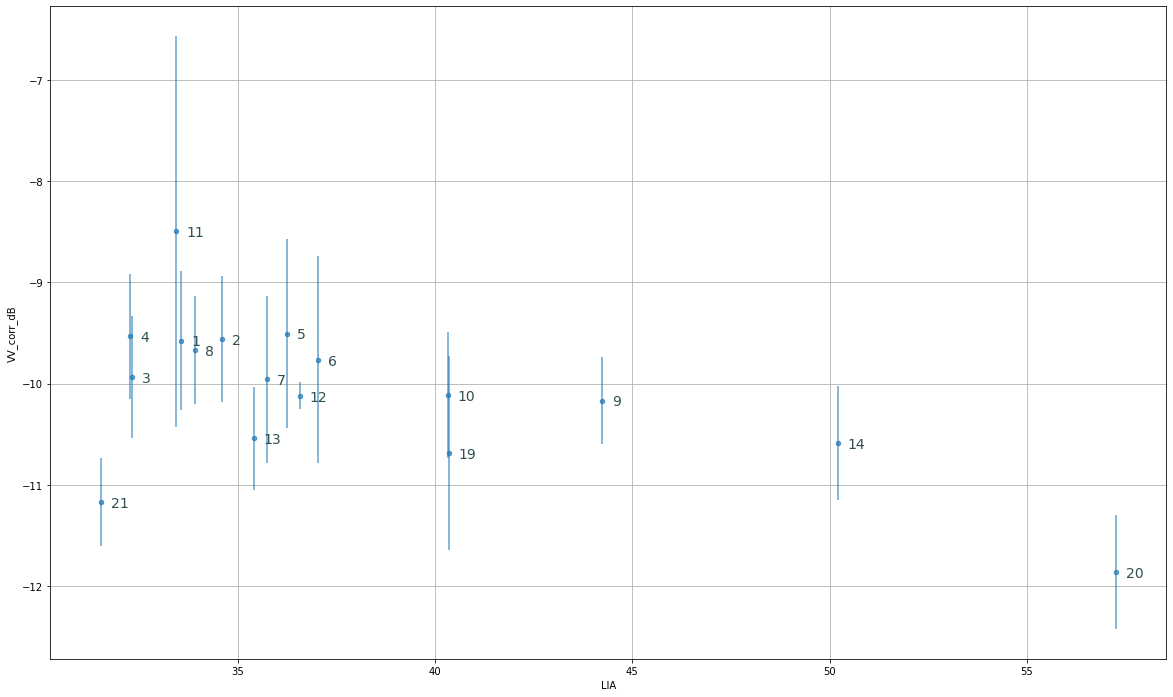

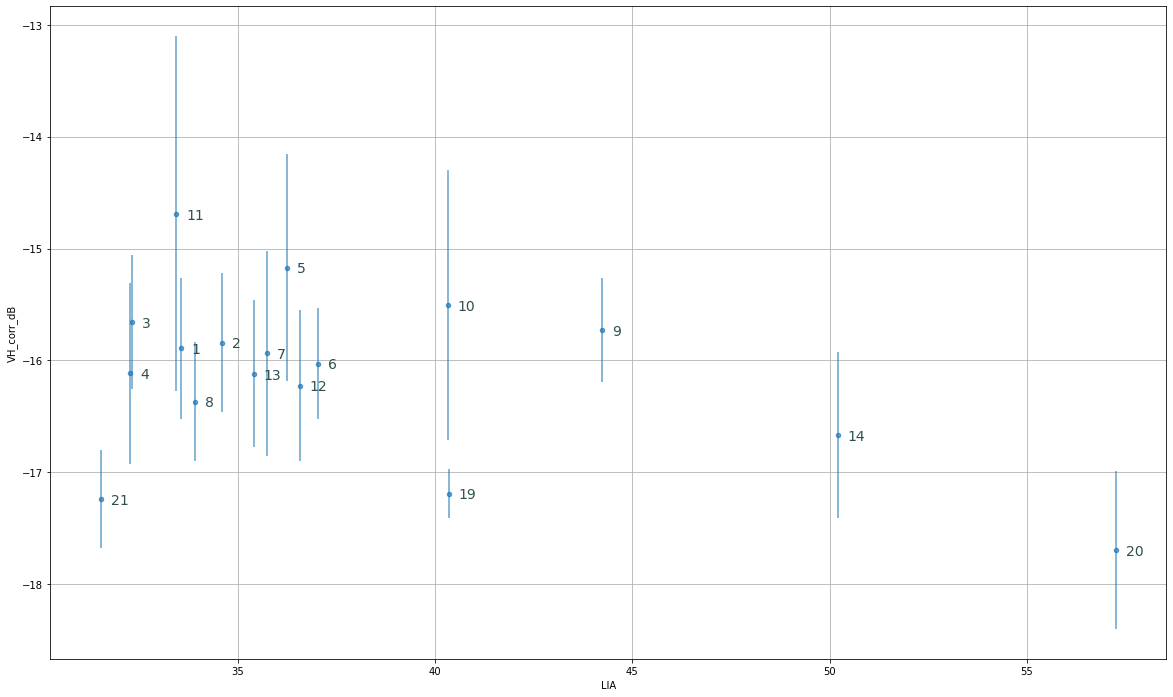

In [27]:
# preliminares Sentinel - estudio angulo de incidencia

toPlot = ['VV_corr_dB', 'VH_corr_dB']
toPlotStd = ['VV_std', 'VH_std']

# toPlot = ['VV.1_corr_dB', 'VH.1_corr_dB']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSentinelDes, 'LIA', mean, std)

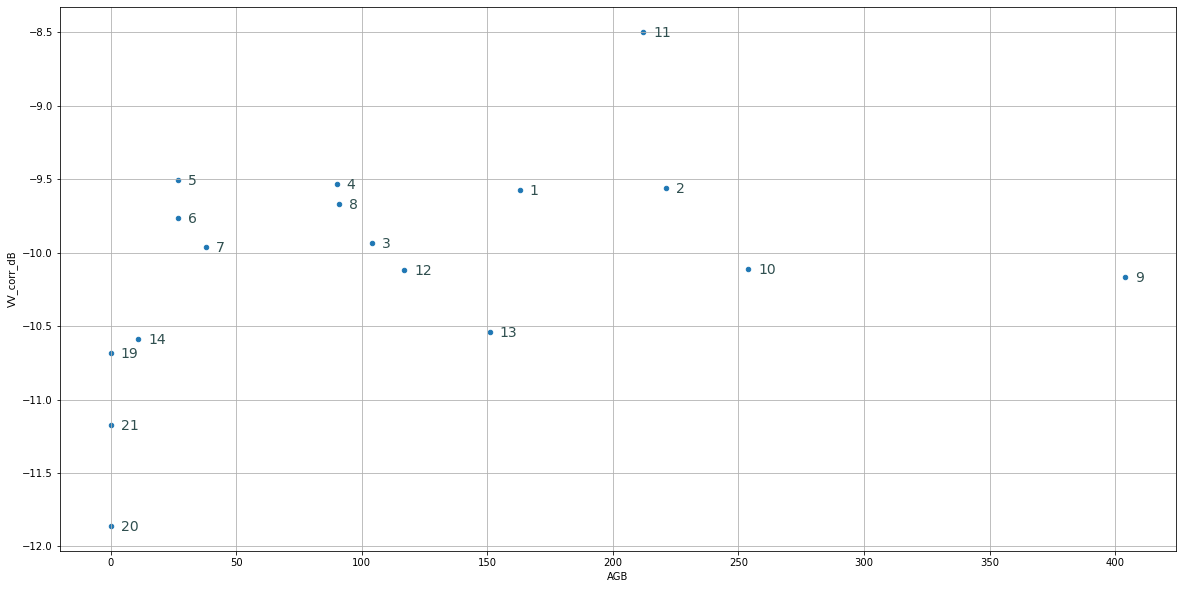

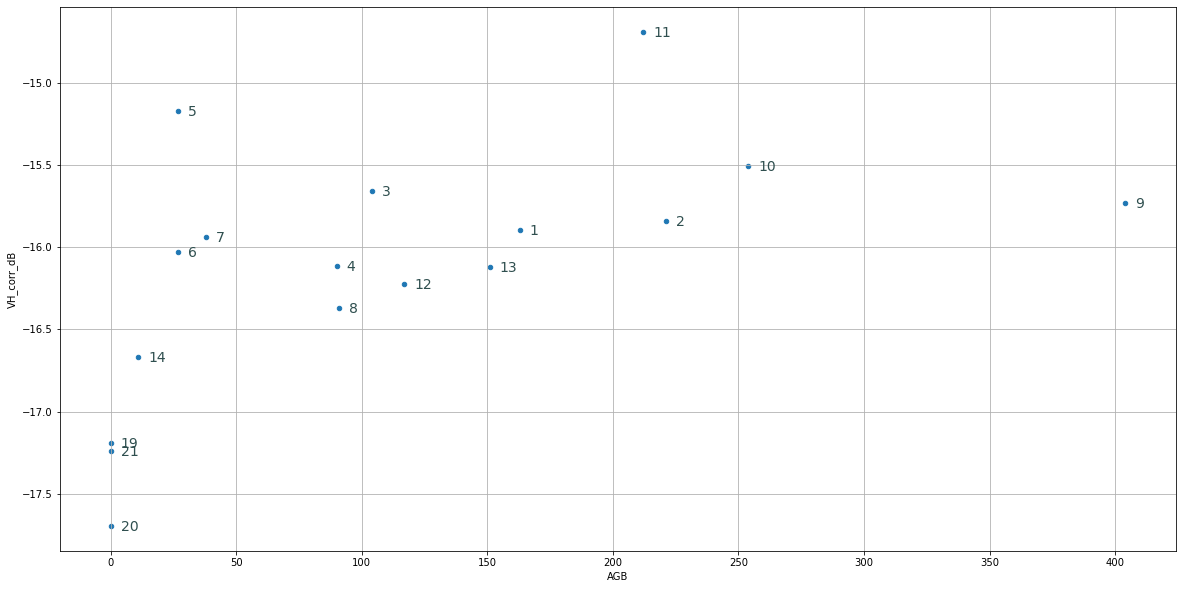

In [28]:
# preliminares Sentinel - estudio Biomasa

toPlot = ['VV_corr_dB', 'VH_corr_dB']

for figura in toPlot:
    anotattedScatter(dataSentinelDes, 'AGB', figura)

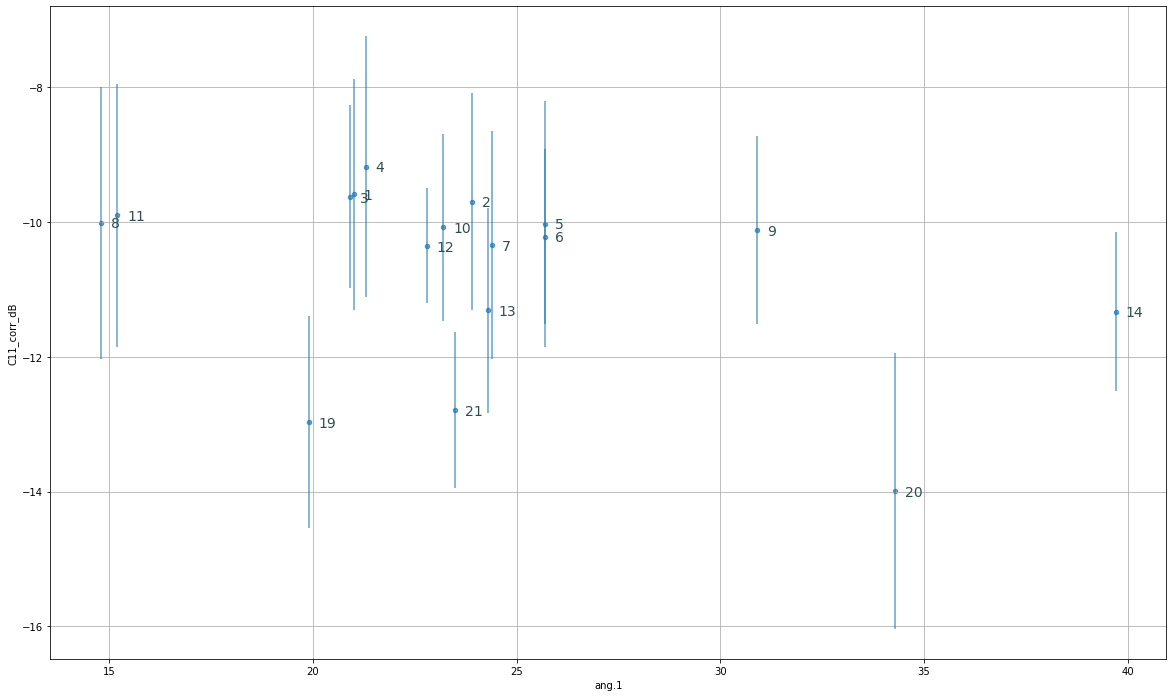

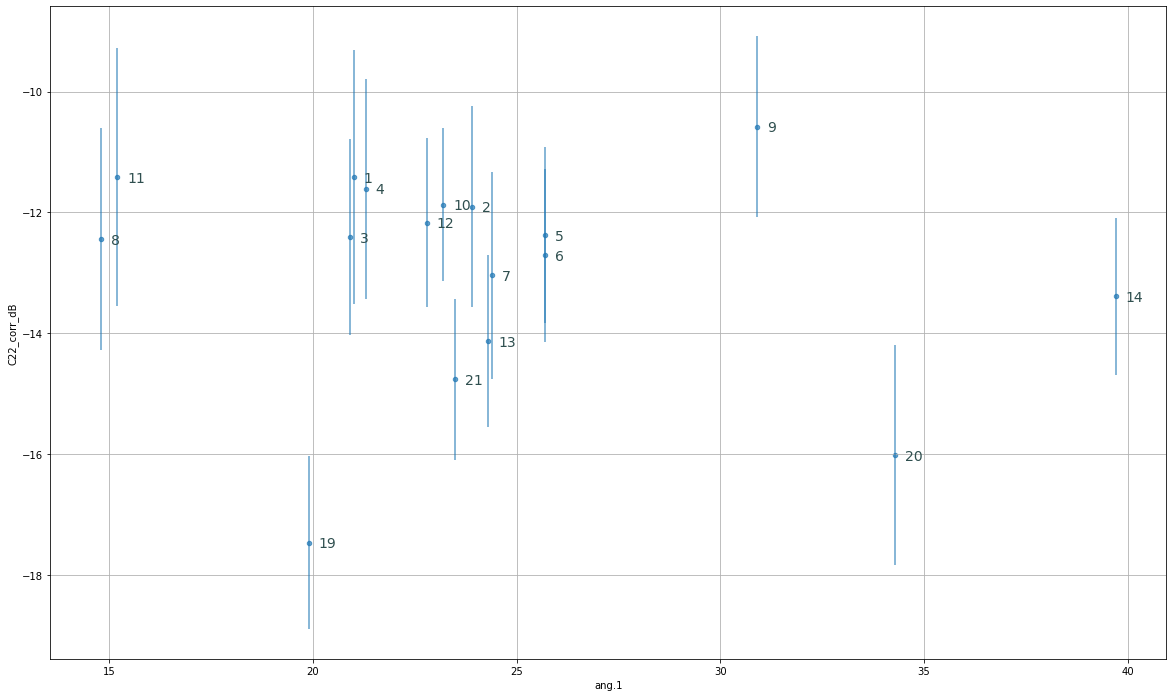

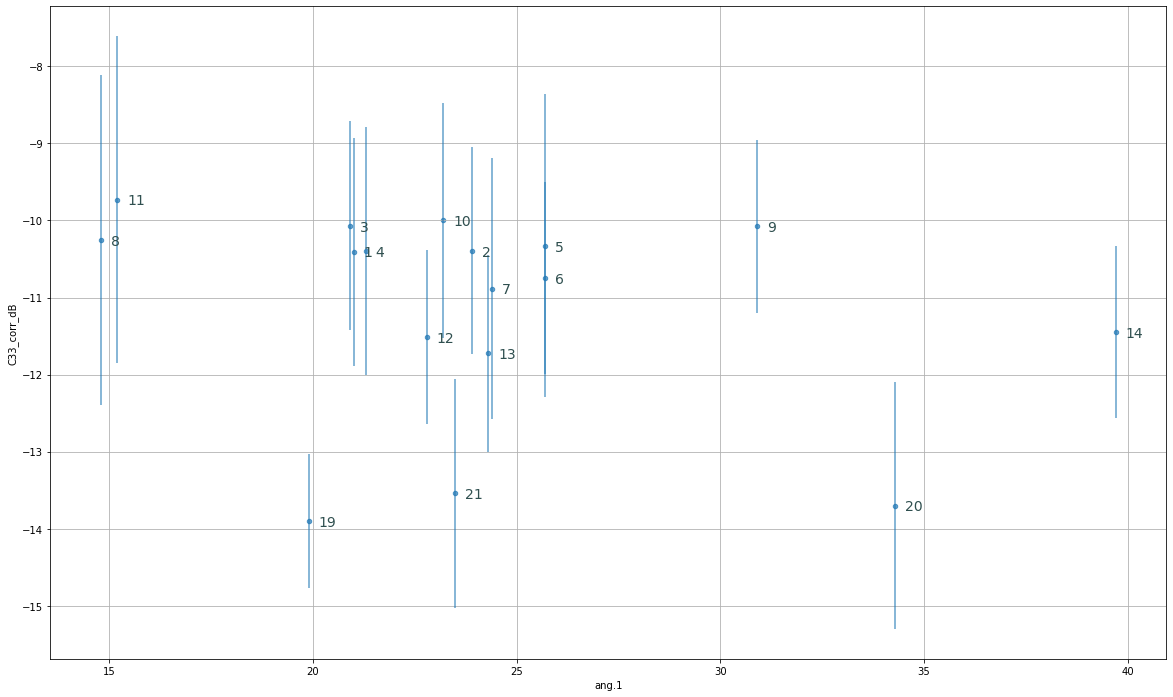

In [29]:
# preliminares SAOCOM - estudio angulo de incidencia

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'ang.1', mean, std)

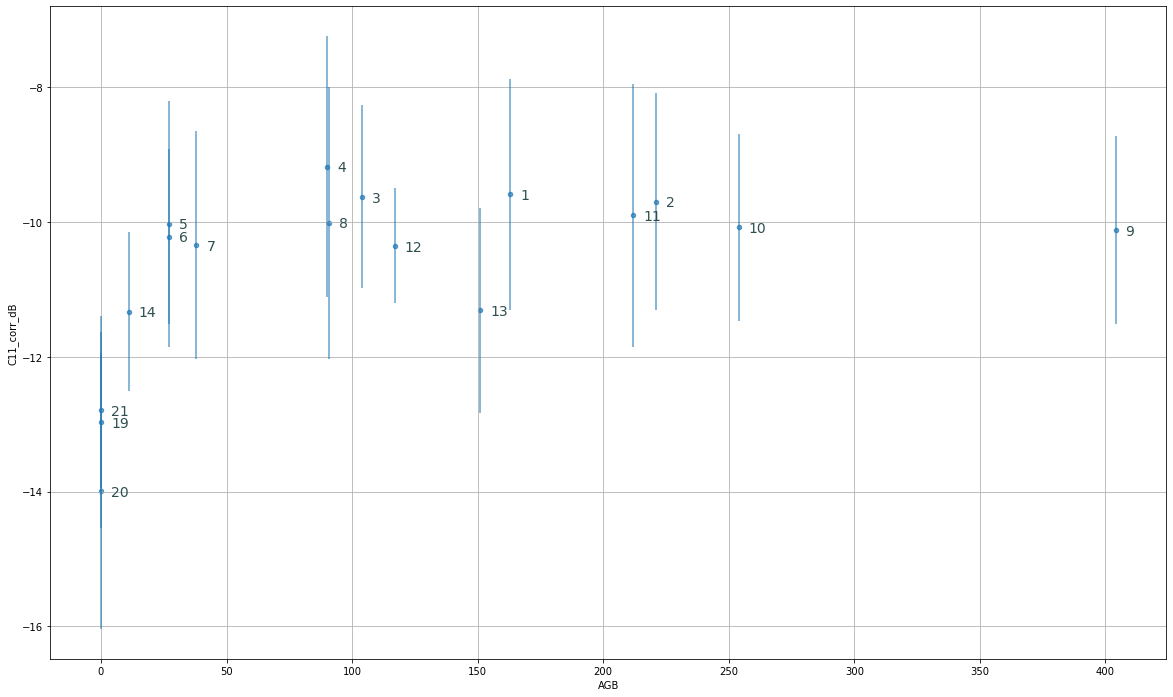

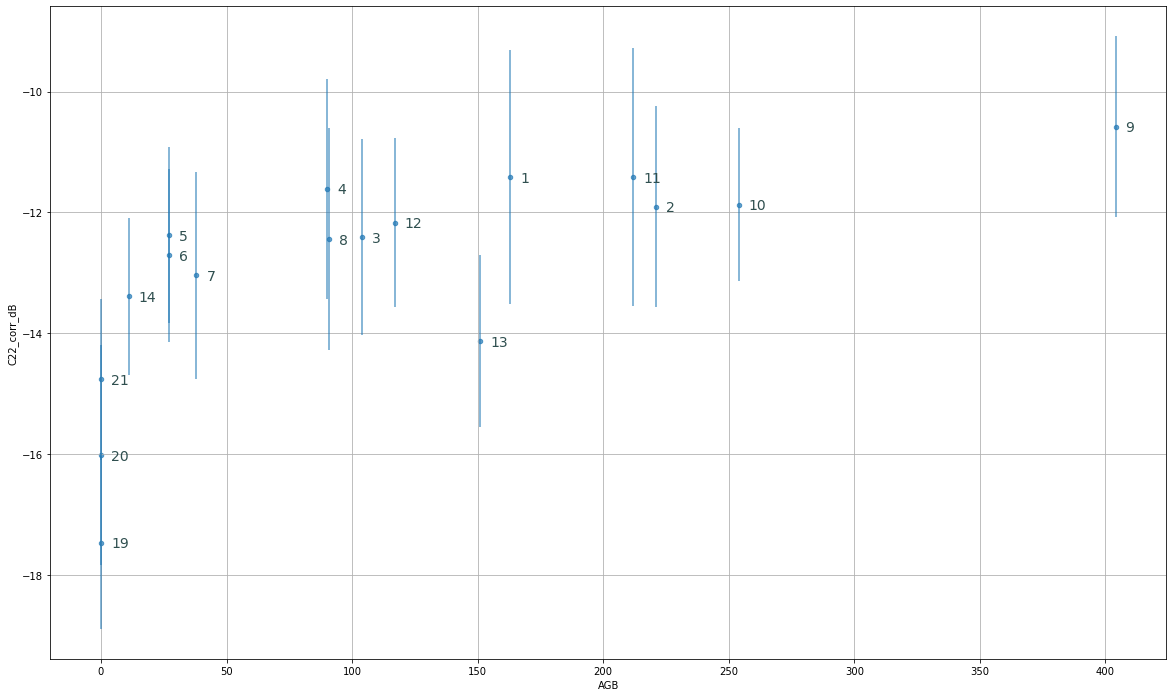

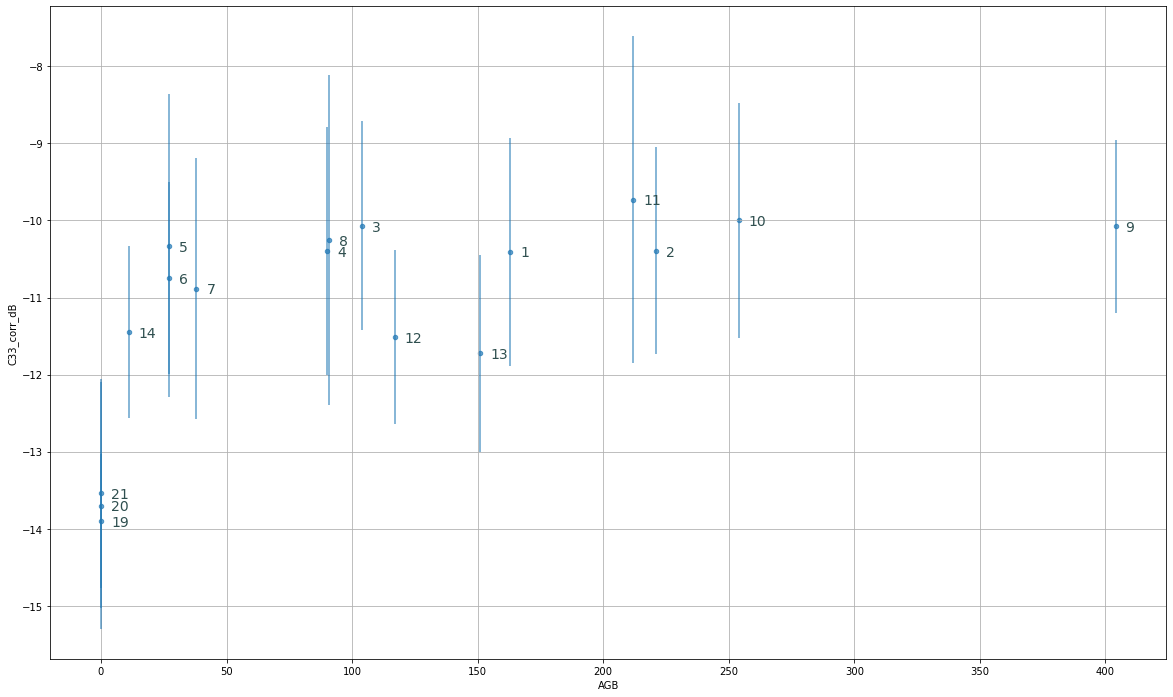

In [30]:
# preliminares SAOCOM - estudio Biomasa

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'AGB', mean, std)

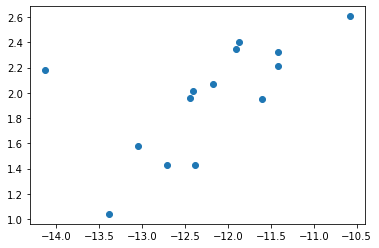

In [32]:
plt.scatter(dataSAOCOM.C22_corr_dB, np.log10(dataSAOCOM.AGB))

In [270]:
# estudio error

# figure(figsize=(20, 6), dpi=80)

# C11_yerr_pos = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] + data_AGB['C11_std']))
# C11_yerr_neg = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] - data_AGB['C11_std']))

# # C11_yerr_pos = 1*np.ones(data_AGB.C11.shape)
# # C11_yerr_neg = 5*np.ones(data_AGB.C11.shape)

# plt.errorbar(data_AGB['NAME'], data_AGB['C11_dB'], yerr=(C11_yerr_neg, C11_yerr_pos))
# # plt.xticks(rotation=90)
# # plt.plot(data_AGB['NAME'], data_AGB['C11_dB'])
# # plt.plot(data_AGB['NAME'], C11_yerr_pos)
# plt.xticks(rotation=90)

In [271]:
# def toProcessGenerator(df):
#     toProcessMean = []
#     toProcessStd = []
#     for col in df.columns:
#         if '_dB' in col:
#             toProcessMean.append(col)
#             stdName = col.split('_')[0]+'_std'
#             toProcessStd.append(stdName)

#     return toProcessMean, toProcessStd

In [272]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)

In [273]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = ['C11_corr', 'C22_corr', 'C33_corr'], ['C11_std', 'C22_std', 'C33_std']
# # No hay datos de std para las descending

# toProcessSentinelMean = []
# toProcessSentinelStd = []

In [274]:
# '''
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)
# '''

# errorBarL(data_AGB, toProcessSAOCOMMean, toProcessSAOCOMStd)

In [275]:
# data_AGB[['C11_corr_pos', 'C11_corr_neg']]

In [276]:
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

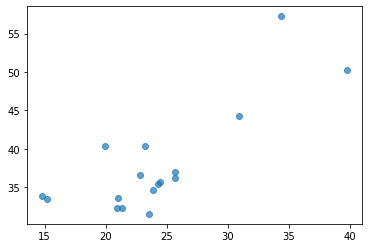

In [277]:
# Estudio angulos SAOCOM vs Sentinel

plt.scatter(dataSAOCOM['ang.1'], dataSentinelDes['LIA'], alpha=0.7) #figsize=(20, 12), grid=True

# for i, txt in enumerate(data_AGB.NAME):
#    striped = txt.split('O')[1]
#    ax.annotate(striped, (data_AGB['ang.1'][i], data_AGB['ang'][i]), xytext=(10,-5), textcoords='offset points',
#                 family='sans-serif', fontsize=14, color='darkslategrey')  

In [278]:
# Polarimetria

In [33]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22',
       'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std', 'C12i_std',
       'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std',
       'ang_std.1', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

In [34]:
C11 = dataSAOCOM['C11_corr'].values#, 'C11std', 
C12 = 1j*dataSAOCOM['C12i_corr'].values + dataSAOCOM['C12r_corr'].values #'C12istd','C12rstd', 
C13 = 1j*dataSAOCOM['C13i_corr'].values + dataSAOCOM['C13r_corr'].values #'C13istd', 'C13rstd', 
C22 = dataSAOCOM['C22_corr'].values #'C22std', 
C23 = 1j*dataSAOCOM['C23i_corr'].values + dataSAOCOM['C23r_corr'].values # 'C23istd',  'C23rstd', 
C33 = dataSAOCOM['C33_corr'].values #, 'C33std'
C21 = np.conjugate(C12)
C31 = np.conjugate(C13)
C32 = np.conjugate(C23)
C = np.asarray([[C11, C12, C13], [C21, C22, C23], [C31, C32, C33]])

In [35]:
Q = np.zeros((C.shape[2],3,3), dtype=complex)

for i in range(C.shape[2]):
    Q[i,:,:] = C[:,:,i]
    
# list(C.reshape((54, 3, 3)))

In [282]:
# for i in range(C.shape[2]):
#     print(C[:,:,i] == Q[i,:,:])

# testeo parte imag C12
# Q_ = C.reshape((54, 3, 3), order='C')

# for i in range(3):
#     for j in range(3):
#         print(C[0,1,:] == Q_[:,i,j])

# type(Q_) == type(C)

# C_ = C.reshape((54,3,3))
# T = np.zeros(C_.shape, dtype = complex)
# for parcela in range(T.shape[0]):
#     T[parcela,:,:] = CaT(C_[parcela,:,:])

In [36]:
dataSAOCOM['C'] = list(Q)

In [37]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22',
       'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std', 'C12i_std',
       'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std',
       'ang_std.1', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB', 'C'],
      dtype='object')

In [285]:
# df = pd.DataFrame({"A":[3,4],"B":[5,6],"C":[7,8]}, index=["a","b"])
# df
# df['otraMas'] = [[1,2], [3,4]]
# df['ultima'] = [[[1,2],[1,2]], [[3,4],[3,4]]]
# cacona = [[[1,2],[1,2]], [[3,4],[3,4]]]
# df['mas'] = cacona


In [38]:
dataSAOCOM['C'][0]

array([[0.10995299+0.j        , 0.00082054+0.00246163j,
        0.02953961-0.00328218j],
       [0.00082054-0.00246163j, 0.07220793+0.j        ,
        0.        +0.00164109j],
       [0.02953961+0.00328218j, 0.        -0.00164109j,
        0.09108046+0.j        ]])

In [39]:
def CaT(C):
    '''
    Pasa de Matriz C a Matriz T.
    Toma como entrada una matriz de 3x3
    '''
    # print(C)
    T = np.zeros((3,3), dtype = complex)
    T[0,0] = C[0,0] + C[2,2] + 2*np.real(C[0,2])
    T[0,1] = C[0,0] - C[2,2] - 2j*np.imag(C[0,2])
    T[0,2] = np.sqrt(2)*(C[0,1] + C[2,1])
    T[1,0] = np.conjugate(T[0,1])
    T[1,1] = C[0,0] + C[2,2] - 2*np.real(C[0,2])
    T[1,2] = np.sqrt(2)*(C[0,1] - C[2,1])
    T[2,0] = np.conjugate(T[0,2])
    T[2,1] = np.conjugate(T[1,2])
    T[2,2] = 2*C[1,1]
    return T

In [40]:
dataSAOCOM['T'] = dataSAOCOM['C'].apply(lambda row: CaT(row)) #axis=1

In [289]:
# Prueba matriz CaT
# Cprueba = C[:,:,10]
# print(Cprueba)
# print(np.around(CaT(Cprueba), 4))


In [290]:
# dataSAOCOM.to_csv('datosViejosMati.csv')

In [291]:
# cuca = pd.read_csv('datosViejosMati.csv', encoding='latin', delimiter = ',')

In [292]:
# cuca.head

In [41]:
# Indicadores que dependen de T

def H(M):
    '''
    calcula Entropia polarimetrica H
    '''
    d,V = np.linalg.eig(M)
   
    #l = np.zeros(3)
    autval = np.zeros(3)
    prb = np.zeros(3)
   
    for k in range(0,2):
        #l[k] = d[k]
#         if l[k] < 0.00001:
#             l[k]=0
        autval[k] = (np.real(d[k]))
    for k in range(0,2):
        prb[k] = autval[k]/sum(autval)

    #calculo de H
    res = 0
    for i in range(0,2):
            if not prb[i] == 0:
                res = res - prb[i]*np.log10(prb[i])/np.log10(3)
    return res

def alfa(M):
    '''
    calcula el angulo alfa polarimetrico alfa
    '''
    d,V = np.linalg.eig(M)
    idx = d.argsort()[::-1] #ordeno los autovalores de forma descendente
   
    l = np.real(d[idx])
    V = V[:,idx]
   
    # Independent target decomposition (T3 seen as the sum of three independent targets represented by a single scattering matrix T3li, i=1,2,3)
#     T3l1 = d[0]*V[:,0]*V[:,0].T
#     T3l2 = d[1]*V[:,1]*V[:,1].T
#     T3l3 = d[2]*V[:,2]*V[:,2].T

    # Target vector associated to max value eigenvalue l1
#     k1 = np.sqrt(d[0])*V[:,0]
#     kAbs = abs(k1)
#     kAngle = angle(k1)
#     k1 = kAbs*exp(1j*kAngle) # notacion exponencial siguiendo ec. 7.4
    p = np.zeros(3)
    alpha = np.zeros(3)
   
    for i in range(0,2):
        p[i] = l[i]/sum(l) #ordenados de mayor a menor probabilidad
        alpha[i] = np.arccos(abs(V[i,0]))*180/np.pi # Given the revised parameterization of the 3x3 U3 matrix (see 7.6, pag. 231, Lee-Pottier)

    alpha0 = sum(alpha*p)   # promedio de los alpha

#     A = (l(1)-l(2))/(l(1)+l(2)) # Anisotropia
#     alpha1 = alpha(0) # el alpha dominante (el que tiene la probabilidad mas grande)
#     alpha2 = alpha(1) # el segundo alpha (el que tiene la probabilidad intermedia)
#     alpha3 = alpha(2) # el alpha marginal (el que tiene la probabilidad mas baja)
   
    return alpha0

def anisotropy(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[1]-L[0])/(L[1]+L[0]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def anisotropiaDeFranco(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[2]-L[1])/(L[2]+L[1]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]


def copol_par(M):
    '''
    parámetro de co-polarización
    '''
   
    return np.real(M[0,0]/M[1,1])

def geom_intens(M):
    '''
    intensidad geométrica
    '''
    return abs(np.linalg.det(M))**(1/3)

def diffFaseCopol(M):
    '''
    Diferencia de fase copol
    '''
    return np.rad2deg(np.arctan2(-0.5*np.imag(M[0,1]), 0.25*np.real((M[0,0]-M[1,1]))))

def alturaPedestal(M):
    '''
    calcula la altura pedesta
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return L[0]/L[2] #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def absHHVV(M):
    '''
    calcula abs HHVV
    '''
    r = 0.25*(M[0,0] - M[1,1])
    i = -0.5*np.imag(M[0,1])
    return np.sqrt(np.real(r**2+i**2)) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

In [42]:
# Indicadores que dependen de C

def corrCopol(M):
    '''
    correlacion canales copol. Pensamos que tiene a cero si la diferencia de fase es 90 deg. 
    Si la diferencia de fase es 0 o 180, corrCopol tiende a 1. 
    '''
    return np.abs(M[0,2]/np.sqrt(M[0,0]*M[2,2]))

def factorConformidad(M):
    '''
    factor de conformidad
    '''
    return np.real((2*np.real(M[0,2])-0.5*M[1,1])/(M[0,0]+M[1,1]+M[2,2]))

def gamma(M):
    '''
    cociente canales copol
    '''
    return np.real(M[0,0]/M[2,2])


In [43]:
# Prueba matriz CaT
Cprueba = C[:,:,5]
T = CaT(Cprueba)
print(Cprueba)
print(T)

[[0.09521603+0.j         0.00510086+0.00510086j 0.03655615+0.00085014j]
 [0.00510086-0.00510086j 0.05355902+0.j         0.00085014-0.00255043j]
 [0.03655615-0.00085014j 0.00085014+0.00255043j 0.08416417+0.j        ]]
[[0.25249251+0.j         0.01105186-0.00170029j 0.00841599+0.01082056j]
 [0.01105186+0.00170029j 0.10626789+0.j         0.00601142+0.00360685j]
 [0.00841599-0.01082056j 0.00601142-0.00360685j 0.10711803+0.j        ]]


In [44]:
print('H: '+str(H(T)))
print('Alfa: '+str(alfa(T)))
print('A: '+str(anisotropy(T)))
print('p-copol: '+str(copol_par(T)))
print('geom_intens: '+str(geom_intens(T)))
print('diffFaseCopol: '+str(diffFaseCopol(T)))
print('alturaPedestal: '+str(alturaPedestal(T)))
print('absHHVV: '+str(absHHVV(T)))
print('corrCopol: '+str(corrCopol(Cprueba)))
print('factorConformidad: '+str(factorConformidad(Cprueba)))
print('gamma: '+str(gamma(Cprueba)))

H: 0.5596957101274007
Alfa: 24.378017177984937
A: 0.05763890702813291
p-copol: 2.376
geom_intens: 0.14145199634659625
diffFaseCopol: 1.332219853869639
alturaPedestal: 0.3906742796445275
absHHVV: 0.03656603882235978
corrCopol: 0.40846914430228615
factorConformidad: 0.19890510948905113
gamma: 1.1313131313131313


In [297]:
# H_ = np.zeros(T.shape[0])
# for parcela in range(T.shape[0]):
#     H_[parcela] = H(T[parcela,:,:])

In [45]:
# batch polarimetrico

dataSAOCOM['H'] = dataSAOCOM['T'].apply(lambda row: H(row))
dataSAOCOM['Alfa'] = dataSAOCOM['T'].apply(lambda row: alfa(row))
dataSAOCOM['A'] = dataSAOCOM['T'].apply(lambda row: anisotropy(row))
dataSAOCOM['AFranco'] = dataSAOCOM['T'].apply(lambda row: anisotropiaDeFranco(row))
dataSAOCOM['p-copol'] = dataSAOCOM['T'].apply(lambda row: copol_par(row))
dataSAOCOM['geom_intens'] = dataSAOCOM['T'].apply(lambda row: geom_intens(row))
dataSAOCOM['diffFaseCopol'] = dataSAOCOM['T'].apply(lambda row: diffFaseCopol(row))
dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
dataSAOCOM['absHHVV'] = dataSAOCOM['T'].apply(lambda row: absHHVV(row))
dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))

In [46]:
dataSAOCOM[['H','Alfa','A']].head()

,H,Alfa,A
0,0.582942,26.370612,0.044915
1,0.586411,27.248857,0.070704
2,0.543138,26.710326,0.130617
3,0.546665,25.547059,0.073286
4,0.571356,25.723000,0.083775


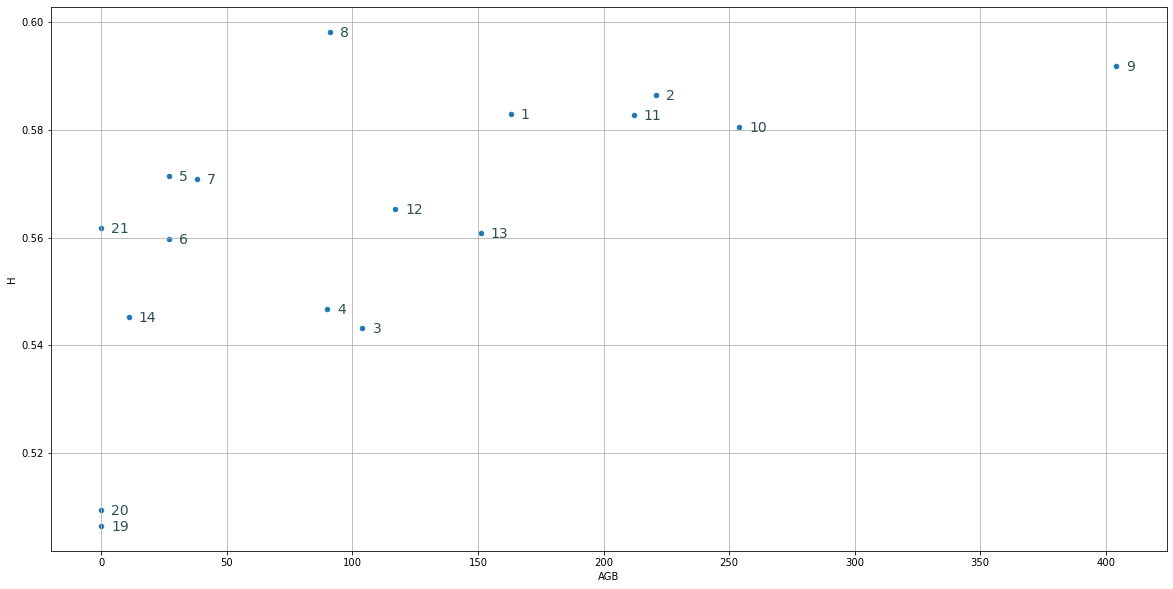

In [300]:
# Estudio intro polarimetrico

anotattedScatter(dataSAOCOM, 'AGB', 'H')

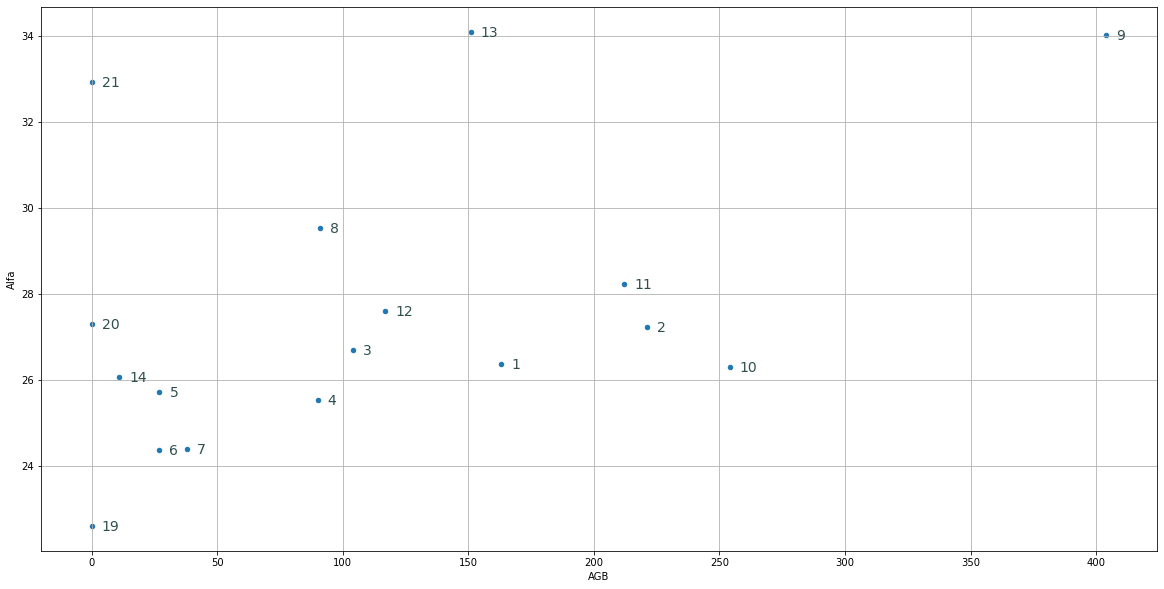

In [301]:
anotattedScatter(dataSAOCOM, 'AGB', 'Alfa')

# plt.scatter(dataSAOCOM['AGB'], dataSAOCOM['Alfa'])
# plt.ylim([0, 90])

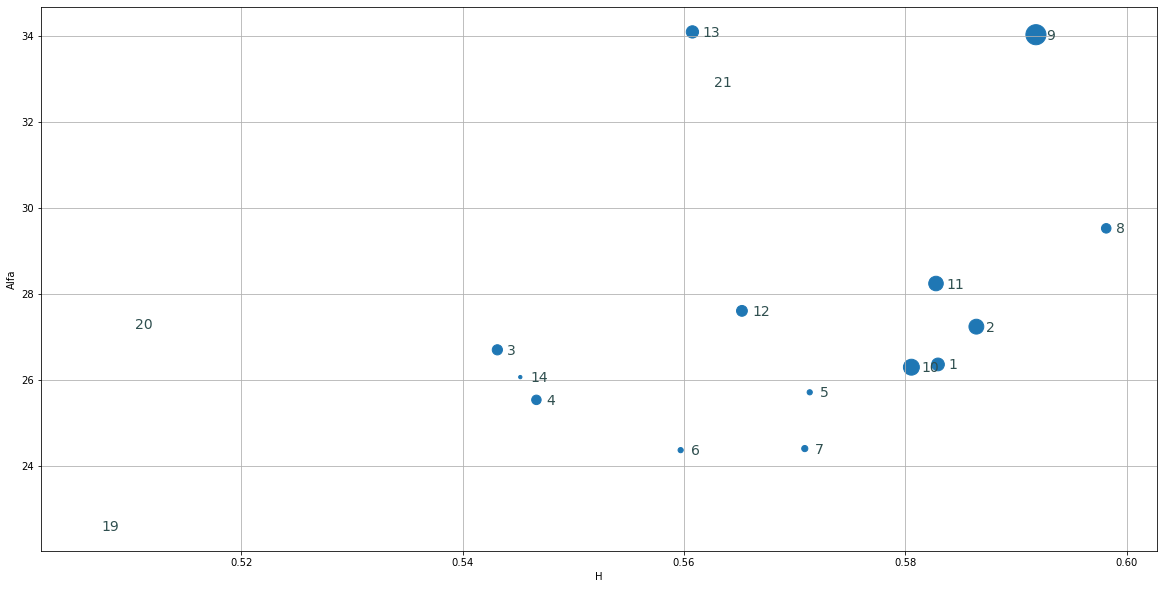

In [302]:
# anotattedScatter(dataSAOCOM, 'H', 'Alfa')


anotattedBubbleScatter(dataSAOCOM, 'H', 'Alfa', 'AGB')

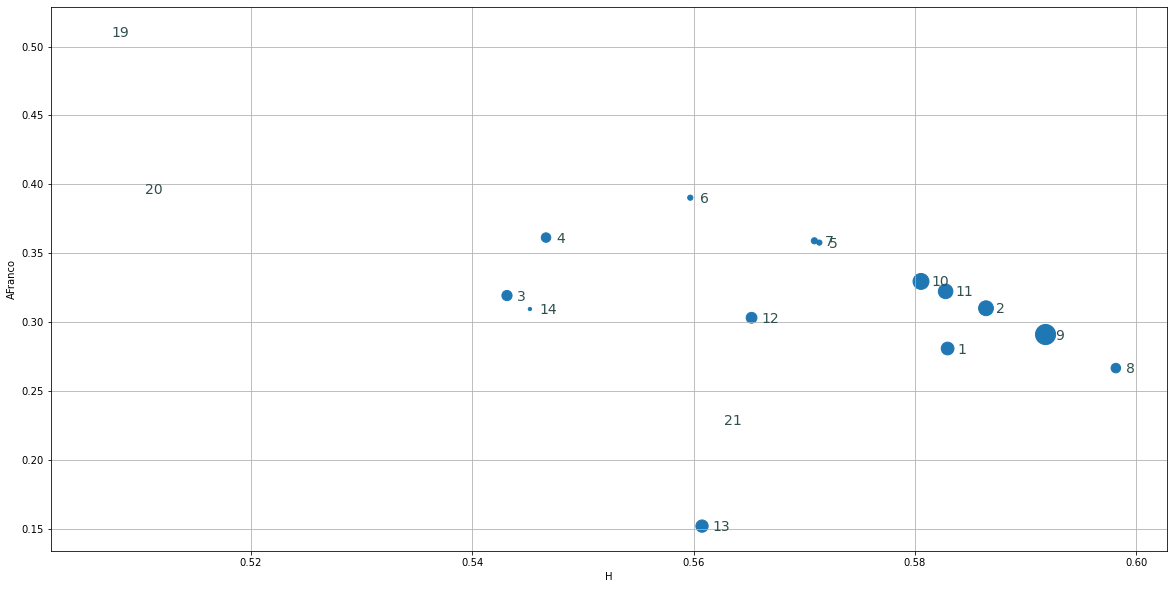

In [303]:
anotattedBubbleScatter(dataSAOCOM, 'H', 'AFranco', 'AGB')

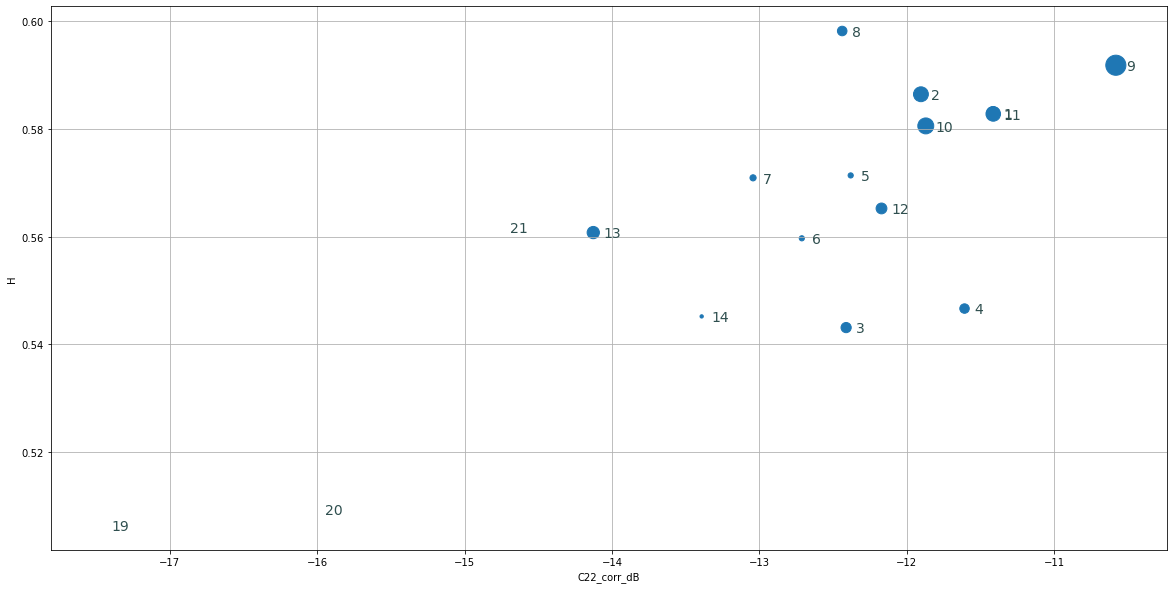

In [304]:
anotattedBubbleScatter(dataSAOCOM, 'C22_corr_dB', 'H', 'AGB')

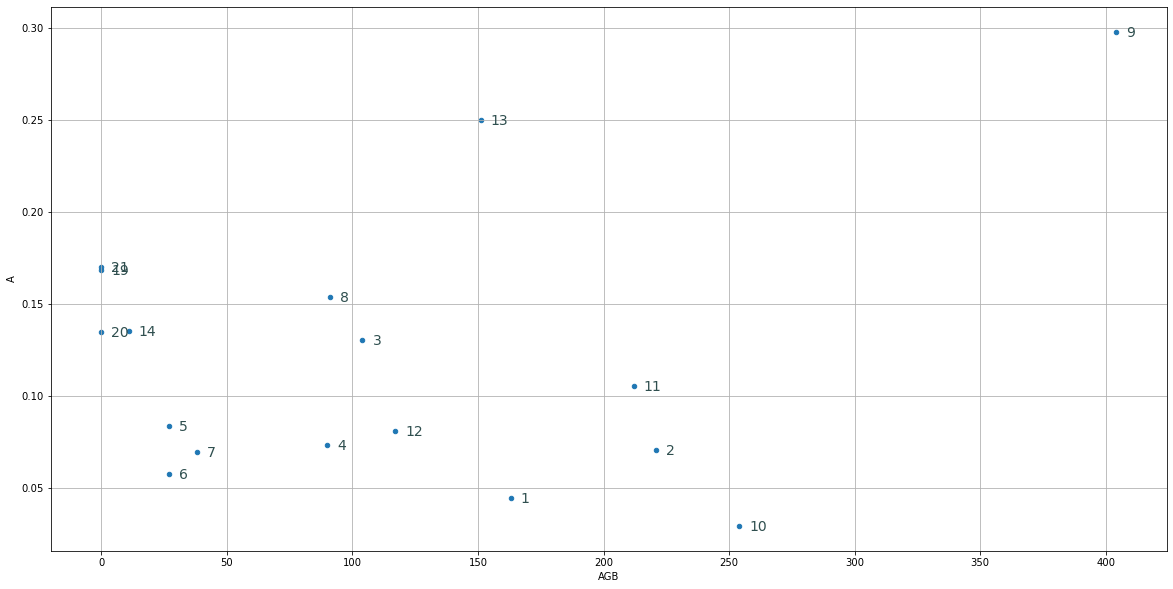

In [305]:
anotattedScatter(dataSAOCOM, 'AGB', 'A')

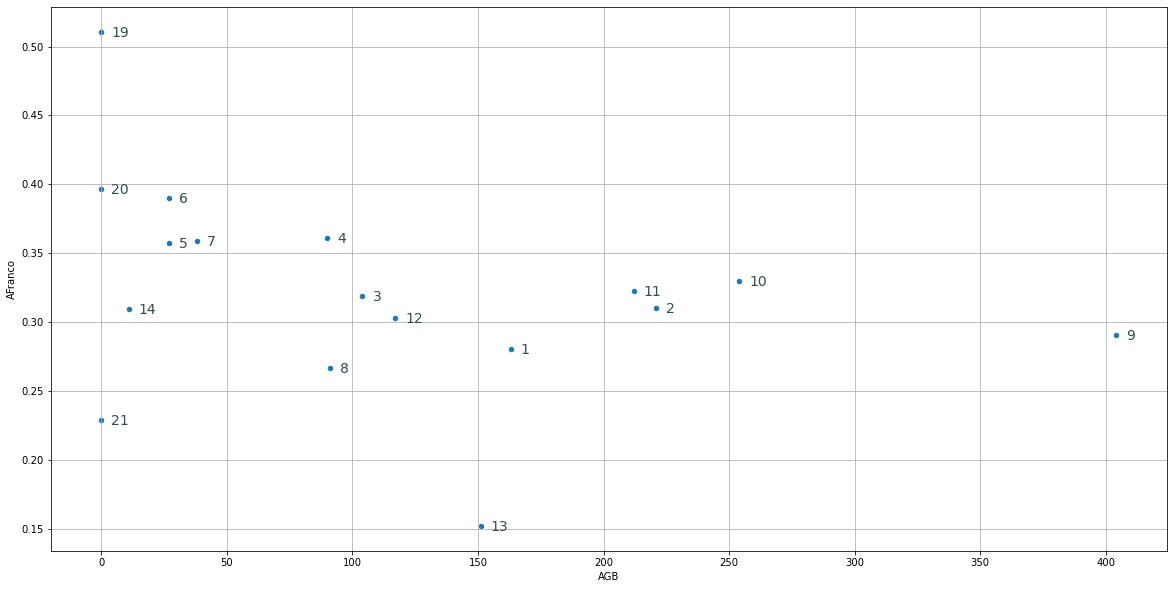

In [306]:
anotattedScatter(dataSAOCOM, 'AGB', 'AFranco')

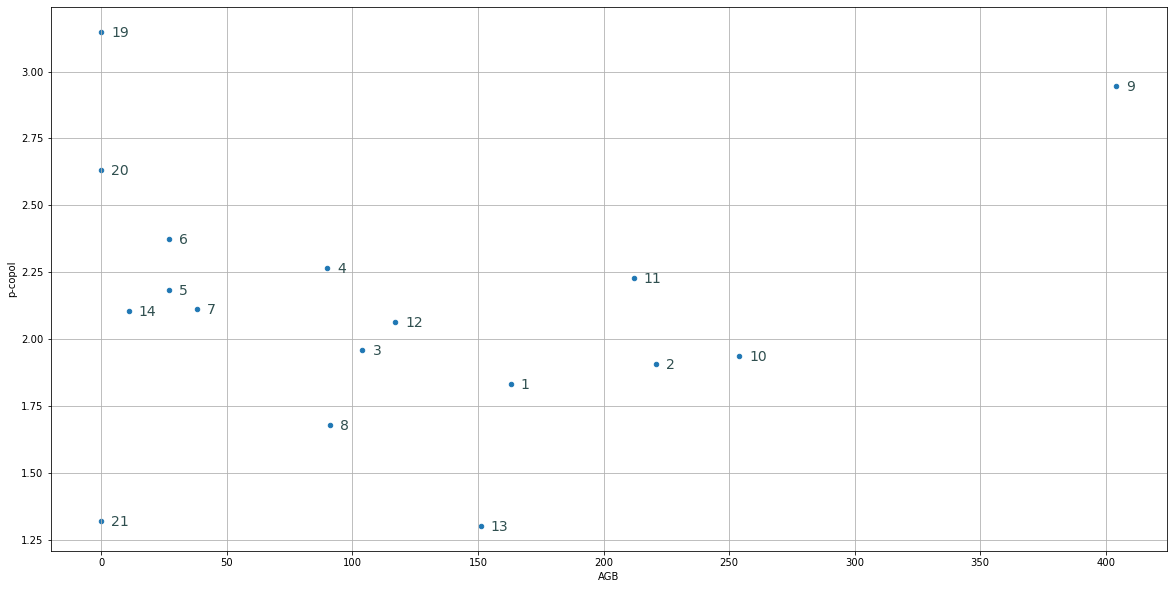

In [307]:
anotattedScatter(dataSAOCOM, 'AGB', 'p-copol')

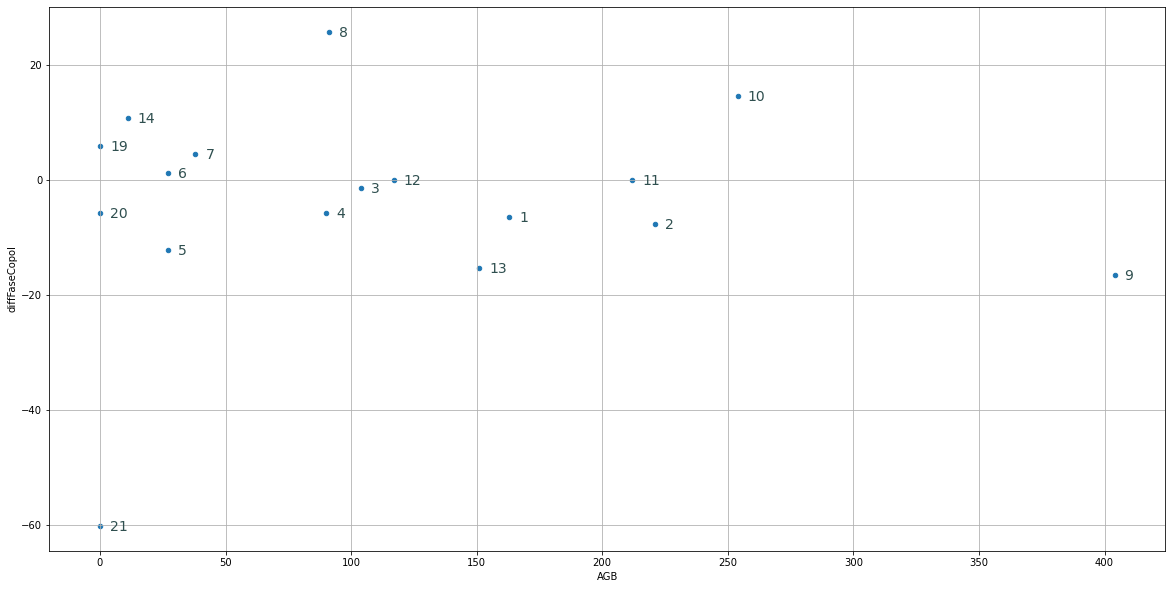

In [308]:
anotattedScatter(dataSAOCOM, 'AGB', 'diffFaseCopol')
# dataSAOCOM['diffFaseCopol']

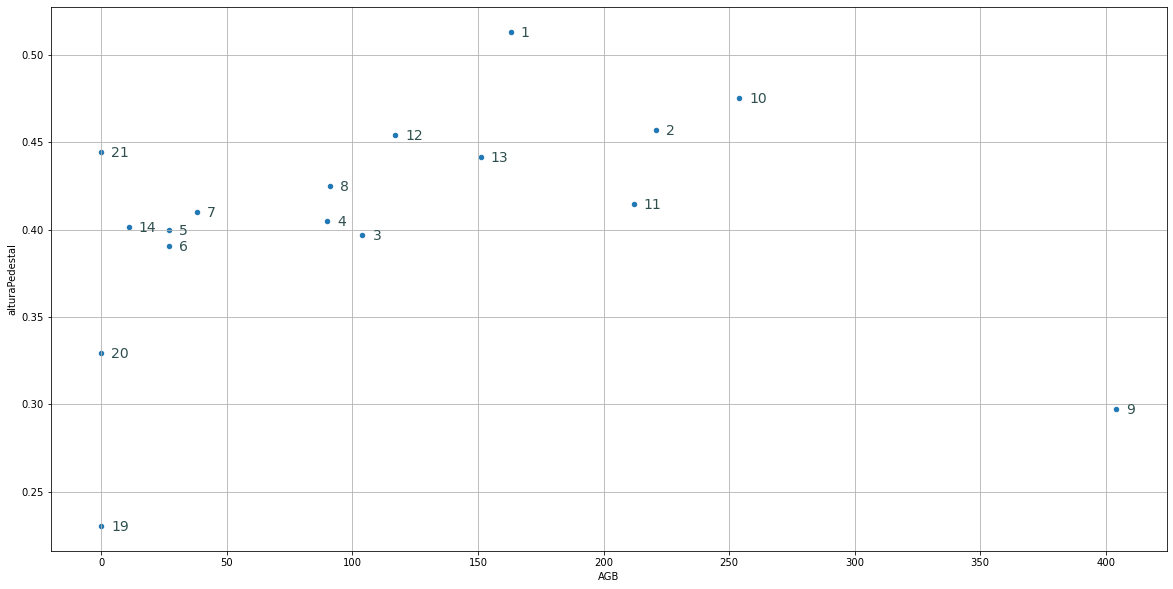

In [309]:
anotattedScatter(dataSAOCOM, 'AGB', 'alturaPedestal')

# dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
# dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
# dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
# dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))

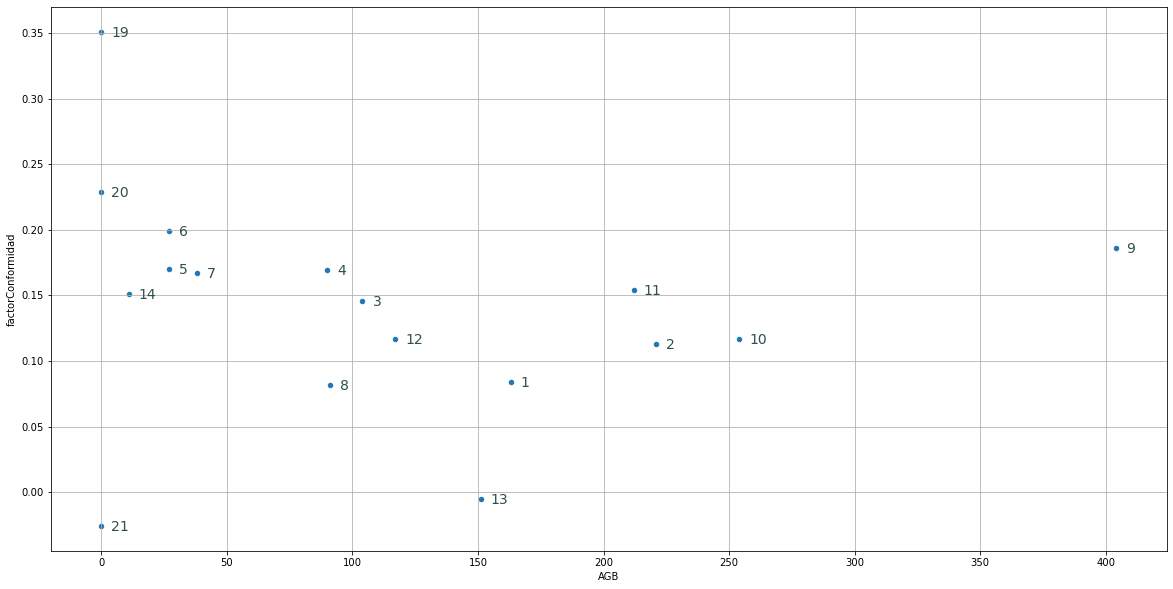

In [310]:
anotattedScatter(dataSAOCOM, 'AGB', 'factorConformidad')


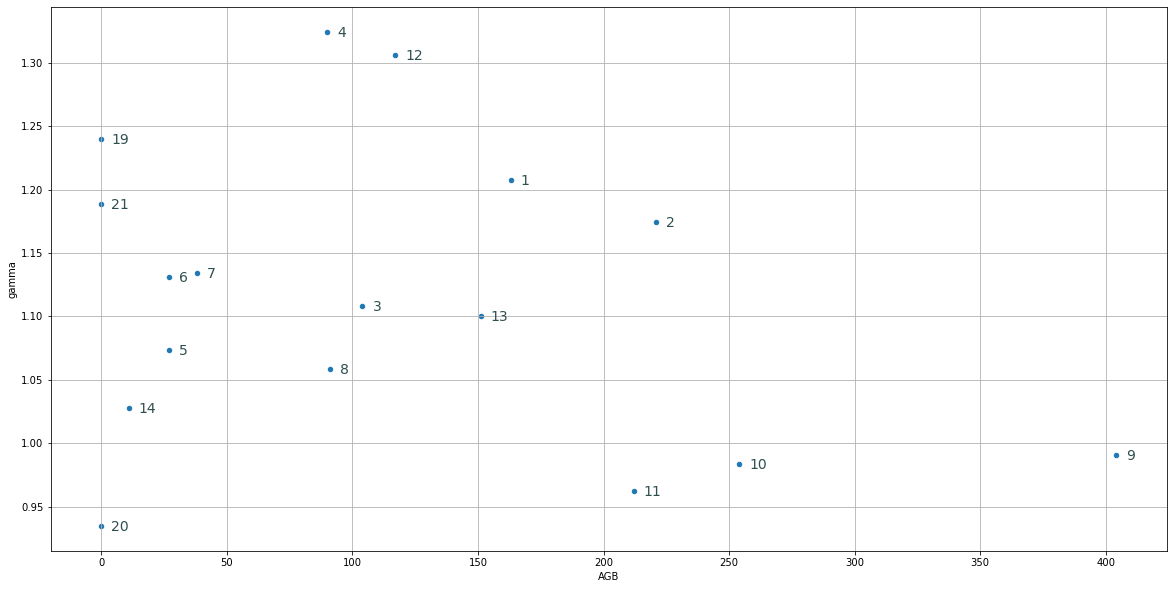

In [311]:
anotattedScatter(dataSAOCOM, 'AGB', 'gamma')

In [312]:
# Inferencia

In [313]:
RANDOM_SEED = 8927
# rng = np.random.default_rng(RANDOM_SEED)
# size = 200
# true_intercept = 1
# true_slope = 2

# x = np.linspace(0, 1, size)
# # y = a + b*x
# true_regression_line = true_intercept + true_slope * x
# # add noise
# y = true_regression_line + rng.normal(scale=0.5, size=size)

In [314]:
def errorBarL(df, colListMean, colListStd):
    ''' 
    largo barras de error
    '''
    pos = np.abs(dB(1 + (df[colListStd]/toPower(df[colListMean]))))
    neg = np.abs(dB(1 - (df[colListStd]/toPower(df[colListMean]))))

    return pos, neg

In [315]:
pos, neg = errorBarL(dataSAOCOM.sort_values('C22_corr_dB'), 'C22_corr_dB', 'C22_std')

In [316]:
pos

14    1.431882
15    1.816227
16    1.332645
12    1.423778
13    1.301244
6     1.713124
5     1.436676
7     1.835188
2     1.622547
4     1.454627
11    1.396133
1     1.658346
9     1.265918
3     1.821989
0     2.103721
10    2.139933
8     1.496729
dtype: float64

In [47]:
dataSAOCOM[['AGB','C22_corr', 'C22_std']]

,AGB,C22_corr,C22_std
0,163,0.072208,0.045
1,221,0.064518,0.030
2,104,0.057400,0.026
3,90,0.069066,0.036
4,27,0.057810,0.023
5,27,0.053559,0.021
6,38,0.049629,0.024
7,91,0.057048,0.030
8,404,0.087490,0.036
9,254,0.065008,0.022


In [318]:
dB(toPower(dataSAOCOM['C22_corr_dB']) + dataSAOCOM['C22_std']) - dataSAOCOM['C22_corr_dB']

0     2.103721
1     1.658346
2     1.622547
3     1.821989
4     1.454627
5     1.436676
6     1.713124
7     1.835188
8     1.496729
9     1.265918
10    2.139933
11    1.396133
12    1.423778
13    1.301244
14    1.431882
15    1.816227
16    1.332645
dtype: float64

In [319]:
sigmaPorPunto = dB(dataSAOCOM['C22_corr'] + dataSAOCOM['C22_std']) - dataSAOCOM['C22_corr_dB']

In [320]:
sigmaPorPunto[np.isnan(sigmaPorPunto)] = 2

In [321]:
sigmaPorPunto

0     2.103721
1     1.658346
2     1.622547
3     1.821989
4     1.454627
5     1.436676
6     1.713124
7     1.835188
8     1.496729
9     1.265918
10    2.139933
11    1.396133
12    1.423778
13    1.301244
14    1.431882
15    1.816227
16    1.332645
dtype: float64

In [48]:
# prepro inferencia

y_raw = np.log10(dataSAOCOM.sort_values('C22_corr_dB')['AGB']+1) #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_raw = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']

def ida(x_, x_min, x_max):
    return (x_ - x_min) / (x_max - x_min)

def vuelta(x_, x_min, x_max):
    return x_*(x_max - x_min) + x_min

y_min = y_raw.min()
y_max = y_raw.max()
x_min = x_raw.min()
x_max = x_raw.max()


x_ = ida(x_raw, x_min, x_max)
y_ = ida(y_raw, y_min, y_max)

Text(0, 0.5, 'log(AGB)')

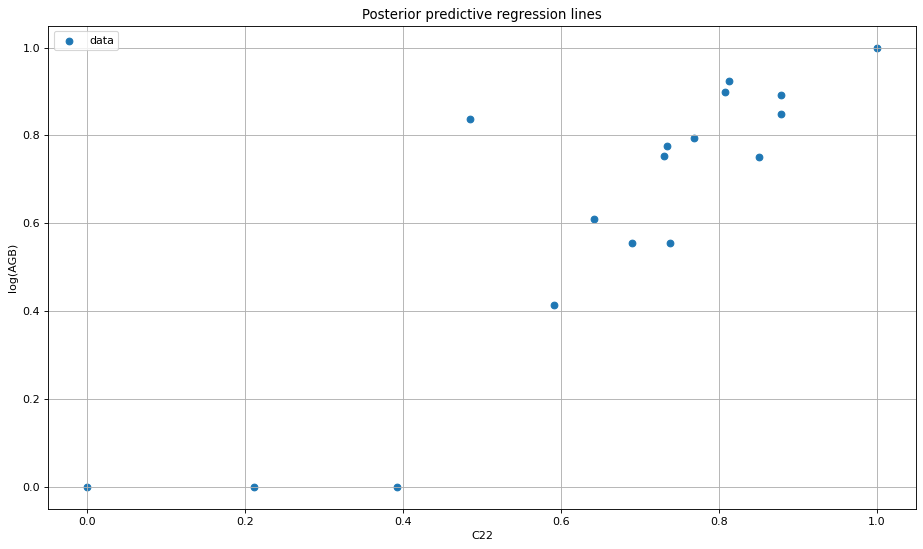

In [49]:
plt.figure(figsize=(14, 8), dpi=80)


plt.scatter(x_, y_, label="data")
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.grid(True)
plt.ylabel("log(AGB)")

In [50]:

with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    sigmaObs = 0.25
    # sigmaObs = sigmaPorPunto
    # sigmaObs = ida(sigmaPorPunto, x_min, x_max)
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x_, sigma=sigmaObs, observed=y_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(5000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=["y"], samples=10000)


/tmp/ipykernel_173254/1020808644.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=1000) #return_inferencedata=True
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.
/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

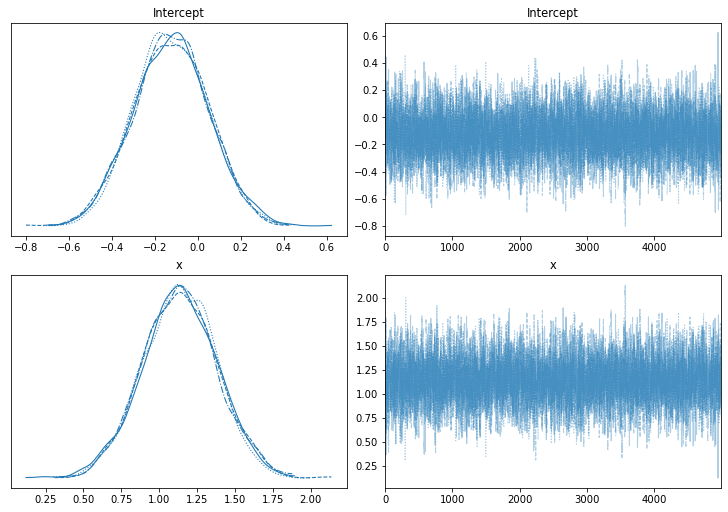

In [51]:
import arviz as az

ppc_y = ppc['y']

az.plot_trace(trace, figsize=(10, 7))

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


Text(0, 0.5, 'log(AGB)')

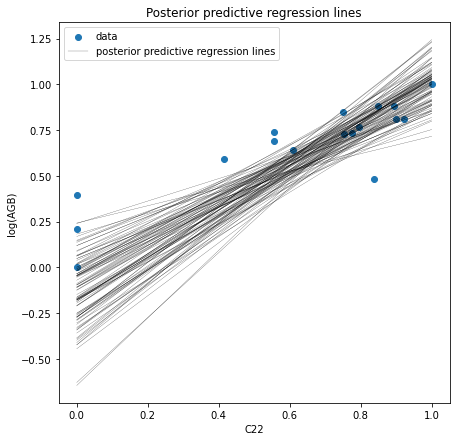

In [52]:
plt.figure(figsize=(7, 7))
# plt.scatter(x_, y, label="data")
plt.scatter(y_, x_, label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

# for i in range(30):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.ylabel("log(AGB)")

Text(0, 0.5, 'C22')

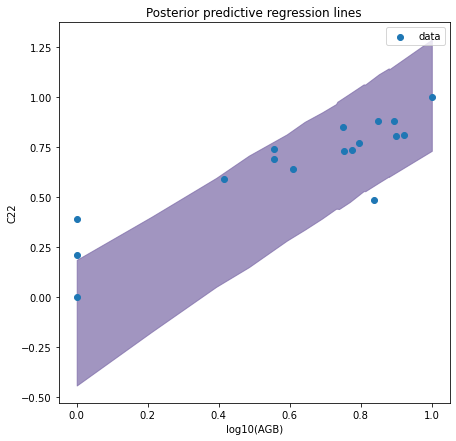

In [53]:
from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5# quantiles for "confidence interval"
# qs = mquantiles(p_t, [0.025, 0.975], axis=0)
# plt.fill_between(t[:, 0], *qs, alpha=0.7,
#                  color="#7A68A6")

# plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

# plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
#          label="average posterior \nprobability of defect")

# plt.xlim(t.min(), t.max())
# plt.ylim(-0.02, 1.02)
# plt.legend(loc="lower left")
# plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
# plt.xlabel("temp, $t$")

# plt.ylabel("probability estimate")
# plt.title("Posterior probability estimates given temp. $t$");

plt.figure(figsize=(7, 7))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
plt.fill_between(x_, *qs, alpha=0.7, color="#7A68A6")


plt.scatter(y_, x_, label="data")

ppc_y_mean = ppc_y.mean(axis=0)
# plt.plot(y_, np.sort(ppc_y_mean), label="mean")

# for i in range(1):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("log10(AGB)")
plt.ylabel("C22")

(17,)

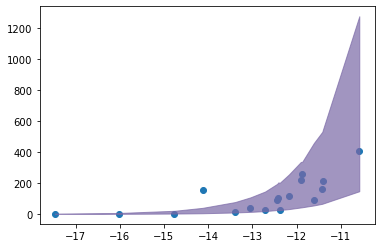

In [54]:
y_vuelta = 10**vuelta(y_, y_min, y_max)
x_vuelta = vuelta(x_, x_min, x_max)
plt.scatter(x_vuelta, y_vuelta)

qs = mquantiles(10**vuelta(ppc_y, y_min, y_max), [0.25, 0.75], axis=0)
plt.fill_between(x_vuelta, *qs, alpha=0.7, color="#7A68A6")

In [357]:
x_

14    0.000000
15    0.033184
2     0.399867
13    0.422460
3     0.438351
5     0.580529
12    0.592117
16    0.603899
11    0.640938
6     0.702868
4     0.707757
9     0.807955
10    0.832212
0     0.834161
1     0.872012
8     0.930722
7     1.000000
Name: H, dtype: float64

In [329]:
# aux = 10**vuelta(ppc_y, y_min, y_max)

In [370]:
# inferencia H

y_ = np.log10(dataSAOCOM.sort_values('H')['AGB']+1) #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_ = dataSAOCOM.sort_values('H')['H']

y_min = y_.min()
y_max = y_.max()
x_min = x_.min()
x_max = x_.max()

y_ = (y_ - y_min) / (y_max - y_min)
x_ = (x_ - x_min) / (x_max - x_min)
# x_ = np.sort(x_)

Text(0, 0.5, 'log(AGB)')

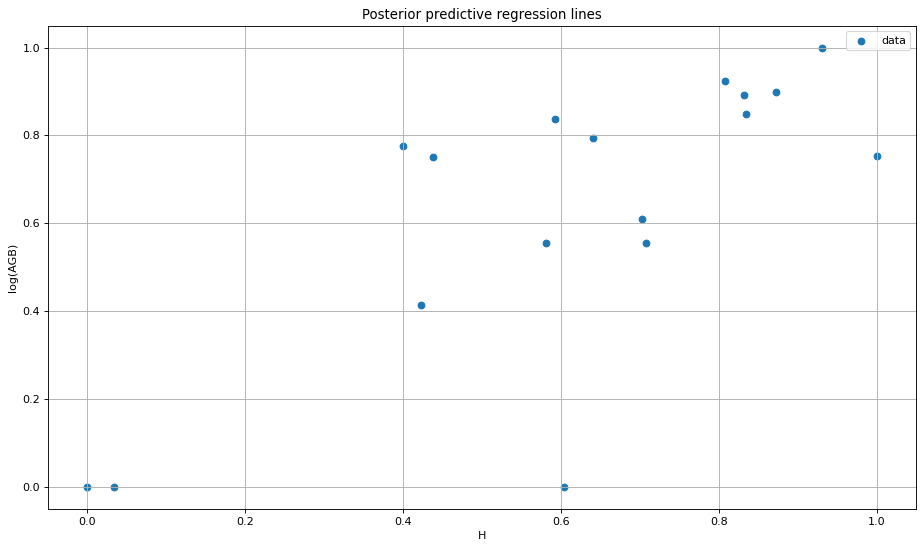

In [371]:
plt.figure(figsize=(14, 8), dpi=80)


plt.scatter(x_, y_, label="data")
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("H")
plt.grid(True)
plt.ylabel("log(AGB)")

In [614]:
with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    sigmaObs = 0.07
    # sigmaObs = sigmaPorPunto
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x_, sigma=sigmaObs, observed=y_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(5000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=["y"], samples=500)

/tmp/ipykernel_10512/1285307148.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=1000) #return_inferencedata=True
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 7 seconds.
The acceptance probability does not match the target. It is 0.8789616748008924, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8861985833797291, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

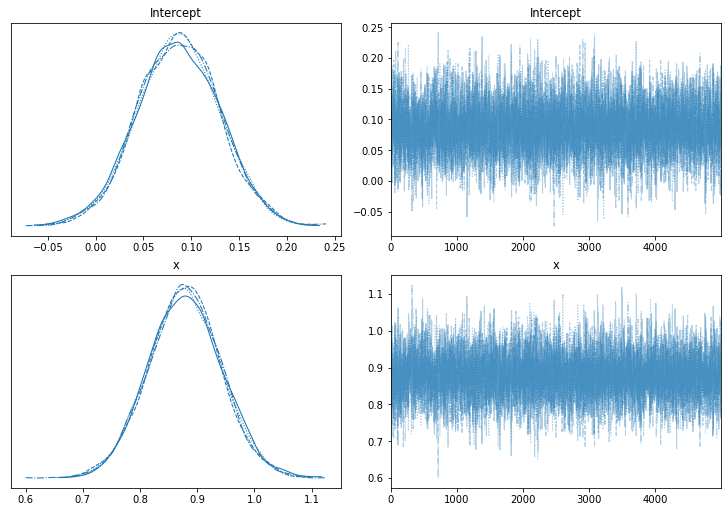

In [615]:
# import arviz as az

ppc_y = ppc['y']

az.plot_trace(trace, figsize=(10, 7))

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


Text(0, 0.5, 'log(AGB)')

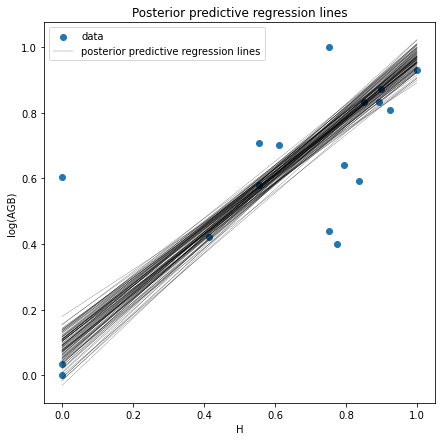

In [616]:
plt.figure(figsize=(7, 7))
# plt.scatter(x_, y, label="data")
plt.scatter(y_, x_, label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

# for i in range(30):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("H")
plt.ylabel("log(AGB)")

Text(0, 0.5, 'H')

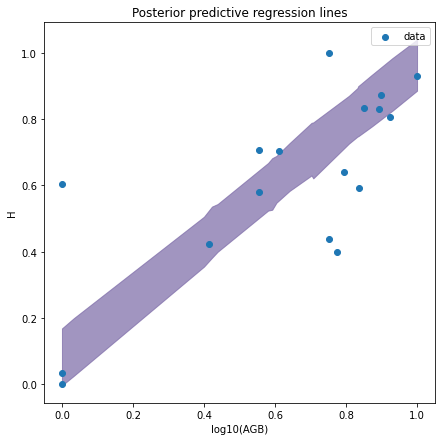

In [617]:
plt.figure(figsize=(7, 7))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
plt.fill_between(x_, *qs, alpha=0.7, color="#7A68A6")


plt.scatter(y_, x_, label="data")

# for i in range(1):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("log10(AGB)")
plt.ylabel("H")

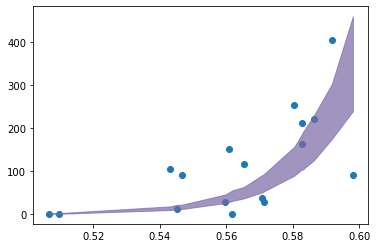

In [607]:
y_vuelta = 10**vuelta(y_, y_min, y_max)
x_vuelta = vuelta(x_, x_min, x_max)
plt.scatter(x_vuelta, y_vuelta)

qs = mquantiles(10**vuelta(ppc_y, y_min, y_max), [0.25, 0.75], axis=0)
plt.fill_between(x_vuelta, *qs, alpha=0.7, color="#7A68A6")

In [386]:
dataSAOCOM.sort_values('AGB')[['AGB','C22_corr','C22_std','H']]

,AGB,C22_corr,C22_std,H
16,0,0.033413,0.012,0.561838
14,0,0.017923,0.007,0.506489
15,0,0.025037,0.013,0.509530
13,11,0.045799,0.016,0.545208
4,27,0.057810,0.023,0.571356
5,27,0.053559,0.021,0.559696
6,38,0.049629,0.024,0.570908
3,90,0.069066,0.036,0.546665
7,91,0.057048,0.030,0.598141
2,104,0.057400,0.026,0.543138


In [114]:
# Inferencia C22 y H

z_raw = np.log10(dataSAOCOM.sort_values('C22_corr_dB')['AGB']+1)
y_raw = dataSAOCOM.sort_values('C22_corr_dB')['H']
x_raw = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']

x_min = x_raw.min()
x_max = x_raw.max()
y_min = y_raw.min()
y_max = y_raw.max()
z_min = z_raw.min()
z_max = z_raw.max()

x_ = ida(x_raw, x_min, x_max)
y_ = ida(y_raw, y_min, y_max)
z_ = ida(z_raw, z_min, z_max)

Text(0, 0.5, 'H')

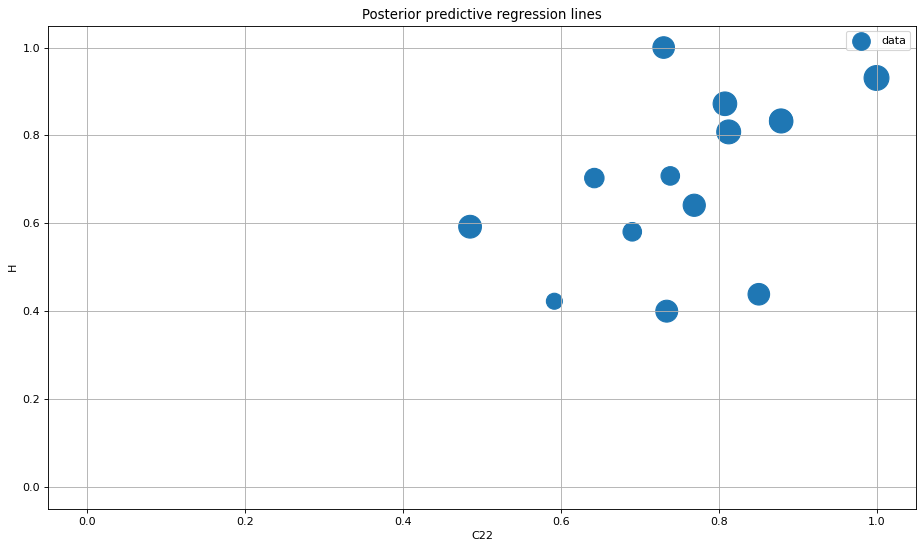

In [121]:
plt.figure(figsize=(14, 8), dpi=80)


plt.scatter(x_, y_, s=500*z_, label="data")
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.grid(True)
plt.ylabel("H")
# plt.zlabel("log(AGB)")

In [150]:
with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    sigmaObs = 0.5
    # sigmaObs = sigmaPorPunto
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x_coeff", mu=0, sigma=10)
    y_coeff = pm.Normal("y_coeff", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("z", mu=intercept + x_coeff * x_ + y_coeff * y_, sigma=sigmaObs, observed=z_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(5000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=["z"], samples=1000)

/tmp/ipykernel_5838/991939397.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=1000) #return_inferencedata=True
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_coeff, x_coeff, Intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 14 seconds.
/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x_coeff'}>,
        <AxesSubplot:title={'center':'x_coeff'}>],
       [<AxesSubplot:title={'center':'y_coeff'}>,
        <AxesSubplot:title={'center':'y_coeff'}>]], dtype=object)

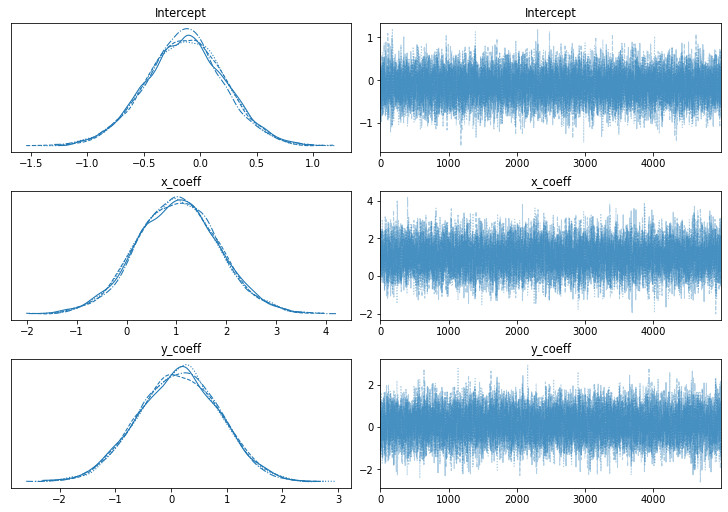

In [151]:
ppc_y = ppc['z']

az.plot_trace(trace, figsize=(10, 7))

Text(0, 0.5, 'log10(AGB')

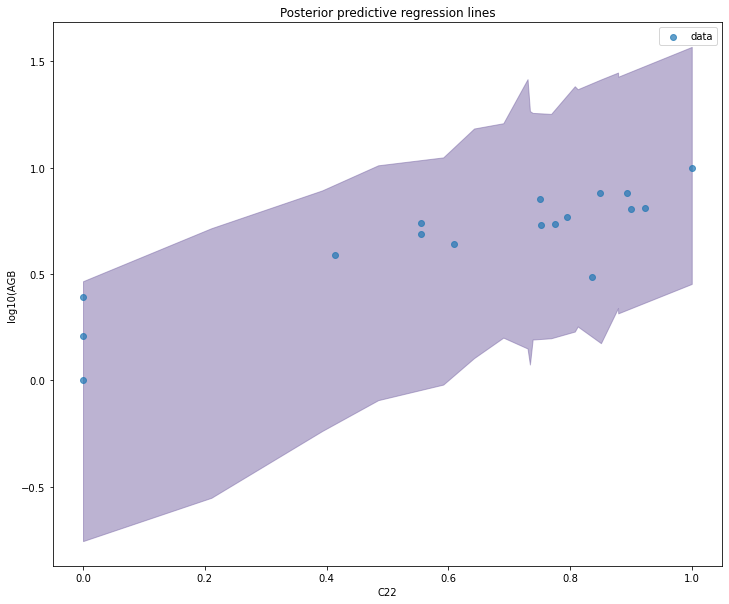

In [152]:
plt.figure(figsize=(12, 10))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
plt.fill_between(x_, *qs, alpha=0.5, color="#7A68A6")


plt.scatter(z_, x_, alpha=0.7,  label="data")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.ylabel("log10(AGB")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'log10(AGB')

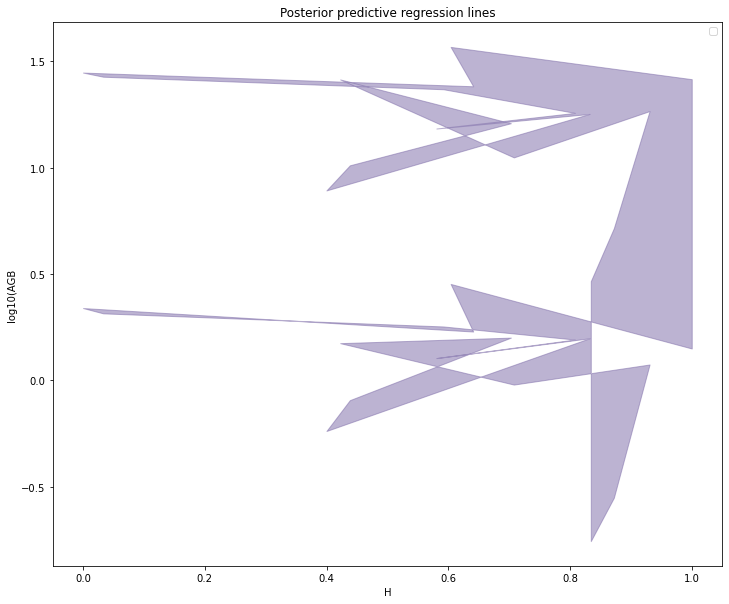

In [159]:
plt.figure(figsize=(12, 10))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)

aux = np.argsort(y_)
qs_sorted = qs[:,aux]
y_sorted = y_[aux]

plt.fill_between(y_sorted, *qs_sorted, alpha=0.5, color="#7A68A6")


plt.scatter(z_, y_, alpha=0.7,  label="data")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("H")
plt.ylabel("log10(AGB")

Text(0.5, 0, 'log10(AGB)')

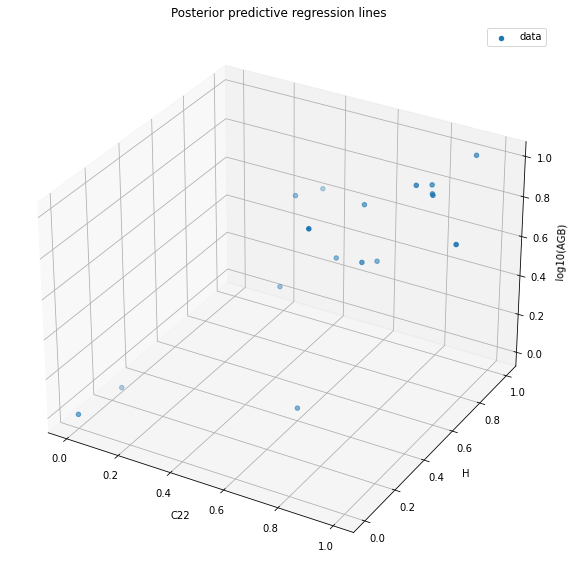

In [154]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
# qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
# plt.fill_between(x_, *qs, alpha=0.5, color="#7A68A6")


ax.scatter(y_, x_, z_, label="data")

# for i in range(1):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
ax.set_xlabel("C22")
ax.set_ylabel("H")
ax.set_zlabel("log10(AGB)")

In [156]:
qs.shape

(2, 17)

In [149]:
qs

masked_array(
  data=[[-2.7140709 , -1.98772424, -1.54413602, -1.59444581, -1.12485234,
         -1.00320609, -1.15203921, -1.46753167, -1.0706004 , -0.68924756,
         -1.57865897, -0.80396416, -0.75763327, -0.80772926, -0.6930341 ,
         -1.03418372, -0.52950441],
        [ 2.34092348,  2.09326138,  2.15362148,  2.41217165,  2.08725818,
          2.15709858,  2.48047799,  2.77814689,  2.35000618,  2.09756481,
          2.95114915,  2.28420725,  2.2947456 ,  2.41242132,  2.44361772,
          2.85036287,  2.58088713]],
  mask=False,
  fill_value=1e+20)

In [ ]:
# Estimacion error en Polarimetria  

In [388]:
ro_HHVV = np.abs(C[0,2]/(np.sqrt(C[0,0]*C[2,2])))
ro_HHHV = np.abs(C[0,1]/(np.sqrt(2*C[0,0]*C[1,1])))
ro_VVHV = np.abs(C[2,1]/(np.sqrt(2*C[1,1]*C[2,2])))



In [392]:
ro_HHVV

array([0.29699766, 0.31609174, 0.32463591, 0.39337842, 0.38035752,
       0.40846914, 0.35937048, 0.28124421, 0.51434793, 0.33021137,
       0.38029687, 0.35003217, 0.13588933, 0.36272451, 0.52363494,
       0.45193663, 0.27904771])

In [389]:
# np.arctan2(y, x)

phi_HHVV = np.arctan2(np.imag(C[0,2]), np.real(C[0,2]))
phi_HHHV = np.arctan2(np.imag(C[0,1]), np.real(C[0,1]))
phi_VVHV = np.arctan2(np.imag(C[2,1]), np.real(C[2,1]))

In [391]:
np.rad2deg(phi_HHVV)

array([ -6.34019175,  -7.69605172,  -1.39718103,  -5.71059314,
       -12.09475708,   1.33221985,   4.63546343,  25.82099197,
       -16.50436138,  14.74356284,   0.        ,   0.        ,
       -15.2551187 ,  10.88552705,   5.90614111,  -5.71059314,
       -60.2551187 ])

In [403]:
# C = np.asarray([[2,2.2],[3.1,4.2]])
C[:,:,0]

array([[0.10995299+0.j        , 0.00082054+0.00246163j,
        0.02953961-0.00328218j],
       [0.00082054-0.00246163j, 0.07220793+0.j        ,
        0.        +0.00164109j],
       [0.02953961+0.00328218j, 0.        -0.00164109j,
        0.09108046+0.j        ]])

In [404]:
from scipy.stats import wishart, chi2

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/scipy/stats/_multivariate.py:1739: ComplexWarning: Casting complex values to real discards the imaginary part
  scale = np.asarray(scale, dtype=float)


1.859865019308951e-08

In [427]:
print(C[:,:,0])

[[0.10995299+0.j         0.00082054+0.00246163j 0.02953961-0.00328218j]
 [0.00082054-0.00246163j 0.07220793+0.j         0.        +0.00164109j]
 [0.02953961+0.00328218j 0.        -0.00164109j 0.09108046+0.j        ]]


In [438]:
wishart.rvs(df=15, scale=np.real(C[:,:,0]), size=1, random_state=10)

array([[ 1.57106236,  0.4602013 ,  0.67922294],
       [ 0.4602013 ,  0.87460105, -0.18657478],
       [ 0.67922294, -0.18657478,  1.74656254]])

In [439]:
wishart.rvs(df=15, scale=C[:,:,0], size=1, random_state=10)

array([[ 1.57106236,  0.4602013 ,  0.67922294],
       [ 0.4602013 ,  0.87460105, -0.18657478],
       [ 0.67922294, -0.18657478,  1.74656254]])

In [432]:
help(wishart.rvs)

Help on method rvs in module scipy.stats._multivariate:

rvs(df, scale, size=1, random_state=None) method of scipy.stats._multivariate.wishart_gen instance
    Draw random samples from a Wishart distribution.
    
    Parameters
    ----------
    df : int
        Degrees of freedom, must be greater than or equal to dimension of the
        scale matrix
    scale : array_like
        Symmetric positive definite scale matrix of the distribution
    size : integer or iterable of integers, optional
        Number of samples to draw (default 1).
    random_state : {None, int, `numpy.random.Generator`,
                    `numpy.random.RandomState`}, optional
    
        If `seed` is None (or `np.random`), the `numpy.random.RandomState`
        singleton is used.
        If `seed` is an int, a new ``RandomState`` instance is used,
        seeded with `seed`.
        If `seed` is already a ``Generator`` or ``RandomState`` instance then
        that instance is used.
    
    Returns
    ---

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/scipy/stats/_multivariate.py:1739: ComplexWarning: Casting complex values to real discards the imaginary part
  scale = np.asarray(scale, dtype=float)


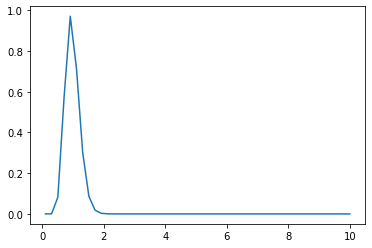

In [411]:
qq = np.linspace(0.1, 10)
ww = np.zeros(50)
for i in range(len(qq)):
    ww[i] = wishart.pdf(qq[i], df=15, scale=C[:,:,0])

plt.plot(qq, ww)

In [ ]:
function [a,d] = cwishrnd(sigma,df,d)

# Para nlooks (<50) chicos anda. Por las dudas, probar usando el xi

# Modificacion hecha basado en 
# https://math.stackexchange.com/questions/2476666/complex-wishart-distribution-in-matlab

# If you take a look at the wishrnd.m function's code, you'll see a couple of things.
# The first is that if the degrees of freedom are less than somewhere around 81 or so,
# then the method that you described is exactly the method that is used to generate the Wishart.
# The only thing that needs to change in the code is that instead of
# 
# x = (randn(df,size(d,1))*d;
# 
# you should be using something like
# 
# x = (randn(df,size(d,1)) + 1i*randn(df,size(d,1)))/sqrt(2) * d;
# 
# to generate the complex normal draws.
# 
# The second method is based on the Bartlett decomposition, and the code specifies a reference of Smith and Hocking (which I frankly never found). An x similar to that used in the real-valued code can be built, but because of the complex nature of the covariance structure, the diagonal elements are not χ2
# -variables, but rather Generalized Gamma distributed (see for example Nagar & Gupta, 2011).
# If you'd like to use this method (i.e. you need degrees of freedom much greater than 80), then in the code, substitute in for a a correctly sized diagonal matrix whose elements are drawn from the generalized gamma distribution as described in the paper, and away you go!
# Nagar, Daya K.; Gupta, Arjun K., Expectations of functions of complex Wishart matrix, Acta Appl. Math. 113, No. 3, 265-288 (2011). ZBL1207.62114.

#WISHRND Generate Wishart random matrix
#   W=WISHRND(SIGMA,DF) generates a random matrix W having the Wishart
#   distribution with covariance matrix SIGMA and with DF degrees of
#   freedom.
#
#   W=WISHRND(SIGMA,DF,D) expects D to be the Cholesky factor of
#   SIGMA.  If you call WISHRND multiple times using the same value
#   of SIGMA, it's more efficient to supply D instead of computing
#   it each time.
#
#   [W,D]=WISHRND(SIGMA,DF) returns D so it can be used again in
#   future calls to WISHRND.
#
#   See also IWISHRND.

#   References:
#   Krzanowski, W.J. (1990), Principles of Multivariate Analysis, Oxford.
#   Smith, W.B., and R.R. Hocking (1972), "Wishart variate generator,"
#      Applied Statistics, v. 21, p. 341.  (Algorithm AS 53)

#   Copyright 1993-2011 The MathWorks, Inc. 


# Error checking
narginchk(2,3);

[n,m] = size(sigma);
if n~=m
   error(message('stats:wishrnd:BadCovariance'));
end

# Factor sigma unless that has already been done
if (nargin<3)
   [d,p] = cholcov(sigma,1);
   if p~=0
      error(message('stats:wishrnd:BadCovariance'))
   end
elseif ~isempty(sigma)
   if size(d,2) ~= n || size(d,1) > n
      error(message('stats:wishrnd:BadCovFactor'))
   end
else
   n = size(d,2);
end

if (~isscalar(df)) || (df<=0)
   error(message('stats:wishrnd:BadDf'))
elseif (df<=n-1) && (df~=round(df))
   error(message('stats:wishrnd:BadDf'));
end

# For small degrees of freedom, generate the matrix using the definition
# of the Wishart distribution; see Krzanowski for example
if (df <= 81+n) && (df==round(df))
   % x = randn(df,size(d,1)) * d;
   x = (randn(df,size(d,1)) + 1i*randn(df,size(d,1)))/sqrt(2) * d; % MODIFICACiON

# Otherwise use the Smith & Hocking procedure
# W.B. Smith and R.R. Hocking, “Algorithm AS 53: Wishart Variate Generator”, Applied Statistics, vol. 21, pp. 341-345, 1972.
else
   # Load diagonal elements with square root of chi-square variates
   a = diag(sqrt(chi2rnd(df-(0:n-1))));

   # Load upper triangle with independent normal (0, 1) variates
   a(itriu(n)) = randn(n*(n-1)/2,1);

   # Desired matrix is D'(A'A)D
   x = a(:,1:size(d,1))*d;
end

a = x' * x;


# --------- get indices of upper triangle of p-by-p matrix
function d=itriu(p)

d=ones(p*(p-1)/2,1);
d(1+cumsum(0:p-2))=p+1:-1:3;
d = cumsum(d);

In [56]:
# function [a,d] = cwishrnd(sigma,df,d)

# def cwishrnd(sigma,df,d):
def cwishrnd(sigma,df):

   # # Error checking
   # narginchk(2,3);

   n,m = sigma.shape
   if n is not m: 
      print('stats:wishrnd:BadCovariance')

   # Factor sigma unless that has already been done
   # if (nargin<3):
   #    [d,p] = cholcov(sigma,1);
   #    if p~=0
   #       error(message('stats:wishrnd:BadCovariance'))
   #    end
   # elseif ~isempty(sigma)
   #    if size(d,2) ~= n || size(d,1) > n
   #       error(message('stats:wishrnd:BadCovFactor'))
   #    end
   # else
   #    n = size(d,2);
   # end

   # if (~isscalar(df)) || (df<=0)
   #    error(message('stats:wishrnd:BadDf'))
   # elseif (df<=n-1) && (df~=round(df))
   #    error(message('stats:wishrnd:BadDf'));
   # end

   # For small degrees of freedom, generate the matrix using the definition
   # of the Wishart distribution; see Krzanowski for example

   d = np.linalg.cholesky(sigma) # suposicion de aca https://www.mathworks.com/help/stats/cholcov.html

   if (df <= 81+n):
      # x = randn(df,size(d,1)) * d;
      
      # x = (np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2) * d # MODIFICACiON
      x = np.matmul((np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2), d.T)

   
   return np.matmul(np.conj(x.T), x)
   # Otherwise use the Smith & Hocking procedure
   # W.B. Smith and R.R. Hocking, “Algorithm AS 53: Wishart Variate Generator”, Applied Statistics, vol. 21, pp. 341-345, 1972.
   # else
   #    % Load diagonal elements with square root of chi-square variates
   #    a = diag(sqrt(chi2rnd(df-(0:n-1))));

   #    # Load upper triangle with independent normal (0, 1) variates
   #    a(itriu(n)) = randn(n*(n-1)/2,1);

   #    # Desired matrix is D'(A'A)D
   #    x = a(:,1:size(d,1))*d;
   # end

   # a = x' * x;


   # # --------- get indices of upper triangle of p-by-p matrix
   # function d=itriu(p)

   # d=ones(p*(p-1)/2,1);
   # d(1+cumsum(0:p-2))=p+1:-1:3;
   # d = cumsum(d);

In [469]:
# sigma = C[:,:,0]
# df = 15
# d = np.real(np.linalg.cholesky(sigma))
# x = np.matmul((np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2), d)


In [629]:
print(sigma)

[[0.09252926+0.j         0.00168235+0.00084118j 0.03112348+0.00252353j]
 [0.00168235-0.00084118j 0.04962933+0.j         0.00084118-0.0033647j ]
 [0.03112348-0.00252353j 0.00084118+0.0033647j  0.08159399+0.j        ]]


In [57]:
sigma = C[:,:,6]
df = 10

H_dist = np.zeros(10000)
for i in range(10000):
    C_sample = cwishrnd(sigma,df)/df
    # print(C_sample/sigma)
    # print(C_sample)
    H_dist[i] = H(C_sample)

0.5709084003021552
0.0909232883587666


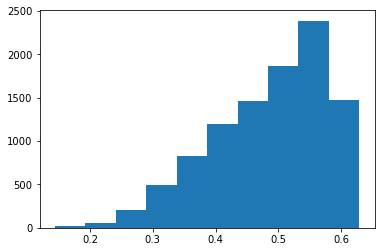

In [58]:
plt.hist(H_dist)
print(H(sigma))
print(np.std(H_dist))

In [522]:
x = np.matmul((np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2), d.T)

print(np.matmul(np.conjugate(x.T),x))

[[ 2.11142372+0.j         -0.2935849 -0.03886075j  0.77365769+0.17091711j]
 [-0.2935849 +0.03886075j  0.91171657+0.j          0.10694472-0.0218554j ]
 [ 0.77365769-0.17091711j  0.10694472+0.0218554j   1.05418241+0.j        ]]


[[ 1.53759409+0.j         -0.42784319+0.32802745j  0.26977271-0.46813585j]
 [-0.42784319-0.32802745j  1.25757266+0.j          0.07875093+0.28141927j]
 [ 0.26977271+0.46813585j  0.07875093-0.28141927j  0.83123138+0.j        ]]


In [ ]:
# Monte Carlo para muestrear matriz de coherencia T

# Uso matrix C de 2x2 para demostrar la corrida
# C11 seria HH y C22 seria VV.

# Modelo para la Matriz de covarianza C=E[]
nl = 15 # numero de looks
C = [0.010,0.012] #  valore medio para E[HHHH*] y E[VVVV*]
rc = 0.7
psi = 0*np.pi/180 #  coherencia y fase (define E[HHVV*])

# Matriz de coherencia 2x2
C11 = C(1)
C22 = C(2)
C12 = np.sqrt(C11*C22)*rc*np.exp(1j*psi)
CC =  [[C11, C12], [np.conj(C12), C22]]

# ***USO Wishart modificada para complejos, nl<50!***
_,L = cwishrnd(CC,nl)
Ws = []
for k in range(10000):
    W =  cwishrnd(CC,nl,L)/nl
    Ws.append(W)

# Asignacion
HHHH = Ws[1,:] ; # HHHH*
VVHH = Ws[2,:] ; # VVHH*
HHVV = Ws[3,:] ; # HHVV*
VVVV = Ws[4,:] ; # VVVV*

# Elemento T11 = |HH + VV|^2 = HHHH* + HHVV* + VVHH* + VVVV* 
T11 = HHHH + HHVV + VVHH + VVVV

# Elemento T12 = (HH + VV)(HH - VV)* = HHHH* - HHVV* + VVHH* - VVVV*
T12 = HHHH - HHVV + VVHH - VVVV

# Elemento T22 = |HH - VV|^2 = HHHH* - HHVV* - VVHH* + VVVV*
T22 = HHHH - HHVV - VVHH + VVVV

# Histogramas
# figure
# subplot(1,3,1), histogram(T11,20)
# subplot(1,3,2), histogram(real(T12),20)
# subplot(1,3,3), histogram(T22,20)

# Asi siguiendo ... 
# A medida que armas la matriz CC de 3x3 o 4x4 podes muestrear los otros elementos de T Tij

In [497]:
cwishrnd(C[:,:,0],15)

array([[ 0.21494064+0.12983005j,  0.08195699+0.02197026j,
         0.16159635+0.28440177j],
       [ 0.08195699+0.02197026j, -0.24201316-0.11249761j,
        -0.0373943 +0.09165715j],
       [ 0.16159635+0.28440177j, -0.0373943 +0.09165715j,
        -0.54861515+0.10044899j]])

In [444]:
np.random.randn

array([[0.10995299+0.j        , 0.00082054+0.00246163j,
        0.02953961-0.00328218j],
       [0.00082054-0.00246163j, 0.07220793+0.j        ,
        0.        +0.00164109j],
       [0.02953961+0.00328218j, 0.        -0.00164109j,
        0.09108046+0.j        ]])